Indian Start-up Ecosystem Funding Analysis (2018-2021)

Business Understanding

Summary of the Task:
This project involves analyzing the funding received by start-ups in India from 2018 to 2021. The goal is to investigate the Indian start-up ecosystem and propose strategic recommendations based on data-driven insights. The datasets are provided for each year, and the analysis will cover start-up details, funding amounts, and investors' information. Data is stored across various sources, and it is crucial to gather, clean, and analyze this data to derive meaningful insights


Project Name:
Indian Start-up Funding Project (2018-2021)

Summary of the Task:
This project involves analyzing the funding received by start-ups in India from 2018 to 2021. The goal is to investigate the Indian start-up ecosystem and propose strategic recommendations based on data-driven insights. The datasets are provided for each year, and the analysis will cover start-up details, funding amounts, and investors' information. Data is stored across various sources, and it is crucial to gather, clean, and analyze this data to derive meaningful insights.

Libraries and Packages:
pandas for data manipulation and analysis
numpy for numerical operations
pyodbc for database connectivity
sqlalchemy for database ORM (optional)
matplotlib and seaborn for data visualization
scikit-learn for machine learning (if applicable)
python-dotenv for managing environment variables
requests for handling HTTP requests (if needed)
os and pathlib for handling file paths and directories

## Business Questions

1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What geographical regions within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India and what factors contribute to this?

5.Which investors have more impact on startups over the years?

6.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

1. Sectors with Highest Growth: This question helps identify the sectors that are experiencing rapid growth in terms of funding received, providing valuable insights into where investor interest and capital are flowing. Understanding these sectors can help investors identify potential high-growth opportunities for investment.

2. Geographical Regions for Startup Activity: Understanding the primary hubs for startup activity and investment within India helps investors gauge where the most vibrant ecosystems are located. Factors contributing to their prominence, such as infrastructure, government support, and access to talent, can influence investment decisions and strategies.

3. Funding Patterns Across Startup Stages: Comparing funding patterns between early-stage startups and more established companies helps investors understand how investment behavior varies depending on the maturity and growth stage of the startup. This insight can inform investment strategies tailored to different stages of the startup lifecycle.

4. Sectorial Funding Disparities: Identifying sectors with the lowest and highest levels of funding sheds light on where capital is concentrated and where there may be untapped opportunities. Understanding the factors contributing to these disparities can help investors assess sector-specific risks and opportunities.

5. Impactful Investors: Analyzing the influence of different investors on startups over the years provides insights into which investors have been most active and successful in driving startup growth. This understanding can help investors identify potential partners or co-investors and assess the reputations and track records of different investment firms.

6. Characteristics of Funded Startups: Identifying key characteristics shared by startups that successfully secure funding helps investors understand what factors contribute to investment readiness and attractiveness. Contrasting these characteristics with those of startups that struggle to attract investment can provide valuable lessons for entrepreneurs and investors alike.

Null Hypothesis(Ho): There is no significant difference in the amount of funding between startups in particular "location".

Alternative Hypothesis(Ha): There is a significant difference in the amount of funding between startups in "Blocation".

In [4841]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

import folium
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.subplots import go
from matplotlib.ticker import FuncFormatter
# Database connectivity
import pyodbc

# Database ORM (optional)
from sqlalchemy import create_engine

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning (if applicable)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Managing environment variables
from dotenv import dotenv_values

# Handling HTTP requests (if needed)
import requests

# Handling file paths and directories
import os
from pathlib import Path


import warnings 

warnings.filterwarnings('ignore')

Loading Data to Python VSO Environment:

1. Database Connection (2020 and 2021 Data):

In [4842]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")


In [4843]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4844]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)





In [4845]:
# Now the sql query to get the data is what what you see below. 


#query = "SELECT * FROM LP2_Telco_churn_first_3000"

# Note that you will not have permissions to insert delete or update this database table. 
# select data from 2020

query = "SELECT * FROM dbo.LP1_startup_funding2020"

data20 = pd.read_sql(query, connection)
data20.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [4846]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [4847]:
data20.shape

(1055, 10)

In [4848]:
# creating a column to identify each dataset by addition of data year

data20['Funding_Year'] = 2020

#Change the funding year to integer type

data20['Funding_Year'] = data20['Funding_Year'].astype(int)

data20.info()

data20.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  Funding_Year   1055 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 86.7+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [4849]:
data20.shape

(1055, 11)

In [4850]:
#printing columns to compare if the column names are matching
print(data20.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10', 'Funding_Year'],
      dtype='object')


In [4851]:
# Renaming some columns

data20.rename(columns = {'Company_Brand' :'Company_Name'}, inplace =True)

data20.rename(columns = {'HeadQuarter': 'Location'}, inplace =True)

data20.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [4852]:
#select specific columns
data20 = data20[['Company_Name', 'Founded','Location','Sector','What_it_does','Founders','Investor','Amount','Stage','Funding_Year']]
                
data20.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [4853]:
# Converting the funded column to numeric data
data20['Founded'] = pd.to_numeric(data20['Founded'], errors='coerce').convert_dtypes(int)

#### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [4854]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2020(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0146, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data20["Amount"] = data20["Amount"].apply(clean_amount_2020)

In [4855]:
# Converting the Amount column to a numeric, there the need to remove some symbols including commas and currency

data20['Amount'] = data20['Amount'].apply(lambda x:str(x).replace('$', ''))

data20['Amount'] = data20['Amount'].apply(lambda x:str(x).replace(',', ''))

data20['Amount'] = data20['Amount'].replace('—', np.nan)




In [4856]:
#Find the number of rows with undisclosed amounts 

index1 = data20.index[data20['Amount']=='Undisclosed']

print('The total number of undisclosed records is', len(index1))

The total number of undisclosed records is 0


In [4857]:
# convert undisclosed to NAN
data20['Amount'] = data20['Amount'].replace('Undisclosed', np.nan)

In [4858]:
#print a summary information on the 2020 data 
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  1055 non-null   object
 1   Founded       842 non-null    Int64 
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   What_it_does  1055 non-null   object
 5   Founders      1043 non-null   object
 6   Investor      1017 non-null   object
 7   Amount        1055 non-null   object
 8   Stage         591 non-null    object
 9   Funding_Year  1055 non-null   int32 
dtypes: Int64(1), int32(1), object(8)
memory usage: 79.5+ KB


In [4859]:
#Find the row with 887000 23000000 in the amount section
index1 = data20.index[data20['Amount']=='887000 23000000']
index1

Index([], dtype='int64')

In [4860]:
#replace the values with the average 
avg = str((887000+23000000)/2)
data20.at[465, 'Amount'] = avg 


In [4861]:
#print the row record to confirm
print(data20.iloc[(465)])

Company_Name                                         True Balance
Founded                                                      2014
Location                                                 Gurugram
Sector                                                    Finance
What_it_does    Earn money by meeting financial needs of your ...
Founders                                     Charlie, Jay, Martin
Investor                                              Balancehero
Amount                                                 11943500.0
Stage                                                    Series C
Funding_Year                                                 2020
Name: 465, dtype: object


In [4862]:

#Find the row with 800000000 to 850000000 in the amount section
index2 = data20.index[data20['Amount']=='800000000 to 850000000']

In [4863]:
#replace the values with the average 
avg = str((800000000+850000000)/2)

data20.at[472, 'Amount'] = avg 

In [4864]:
#print the row record to confirm 
print(data20.iloc[(472)])

Company_Name                                             Eruditus
Founded                                                      2010
Location                                                   Mumbai
Sector                                                  Education
What_it_does    Bring world-class business and professional ed...
Founders                     Chaitanya Kalipatnapu, Ashwin Damera
Investor        Bertelsmann India Investments, Sequoia Capital...
Amount                                                825000000.0
Stage                                                        None
Funding_Year                                                 2020
Name: 472, dtype: object


In [4865]:
#Convert the Amount column to numeric 

data20['Amount'] = pd.to_numeric(data20['Amount'], errors='coerce')

In [4866]:
#print a summary information on the 2020 data 
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  1055 non-null   object 
 1   Founded       842 non-null    Int64  
 2   Location      961 non-null    object 
 3   Sector        1042 non-null   object 
 4   What_it_does  1055 non-null   object 
 5   Founders      1043 non-null   object 
 6   Investor      1017 non-null   object 
 7   Amount        803 non-null    float64
 8   Stage         591 non-null    object 
 9   Funding_Year  1055 non-null   int32  
dtypes: Int64(1), float64(1), int32(1), object(7)
memory usage: 79.5+ KB


In [4867]:
duplicates = data20[data20.duplicated()]

duplicates

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,2020
205,Nykaa,2012,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,2020
362,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,2020


In [4868]:
#drop all duplicates and leave only one record 

data20 = data20.drop_duplicates(keep='first')

In [4869]:
#Check the 2020 datatset information to confirm the datatypes 
data20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  1052 non-null   object 
 1   Founded       839 non-null    Int64  
 2   Location      958 non-null    object 
 3   Sector        1039 non-null   object 
 4   What_it_does  1052 non-null   object 
 5   Founders      1040 non-null   object 
 6   Investor      1014 non-null   object 
 7   Amount        801 non-null    float64
 8   Stage         590 non-null    object 
 9   Funding_Year  1052 non-null   int32  
dtypes: Int64(1), float64(1), int32(1), object(7)
memory usage: 87.3+ KB


In [4870]:
#Check the first set of row 
data20.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [4871]:
# select data from 2021

query = "SELECT * FROM dbo.LP1_startup_funding2021"

data21 = pd.read_sql(query, connection)
data21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [4872]:
data21.shape

(1209, 9)

In [4873]:
data21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [4874]:
# creating a column to identify each dataset by addition of data year

data21['Funding_Year'] = 2021

# change the Funding_Year to interger type

data21['Funding_Year'] = data21['Funding_Year'].astype(int)

data21.info()

data21.head()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Funding_Year   1209 non-null   int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 89.9+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [4875]:
#printing columns to compare if the column names are matching

print(data21.columns)






Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [4876]:
# Renaming some columns

data21.rename(columns = {'Company_Brand' :'Company_Name'}, inplace =True)

data21.rename(columns = {'HeadQuarter': 'Location'}, inplace =True)

data21.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [4877]:
#select specific columns
data21 = data21[['Company_Name', 'Founded','Location','Sector','What_it_does', 'Founders','Investor','Amount','Stage','Funding_Year']]
                
data21.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [4878]:
# total undisclosed in the dataset
index5 = data21.index[data21['Amount']=='Undisclosed']

print(len(index5))

43


In [4879]:
#print the row records 
data21.loc[(index5)].tail()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
824,Avalon Labs,2017.0,Bangalore,FinTech,"Avalon Labs incubates, invests, partners with ...",Varun Mayya,"Tanglin Ventures, Better Capital, Whiteboard C...",Undisclosed,Pre-series A,2021
827,Rezo.ai,2017.0,Noida,AI startup,Conversational AI platform - Innovate the way ...,"Manish Gupta, Rashi Gupta","Devesh Sachdev, Bhavesh Manglani",Undisclosed,Seed,2021
833,Polygon,2017.0,Mumbai,Crypto,Polygon is a blockchain scalability platform.,"Jaynti Kanani, Sandeep Nailwal, Anurag Arjun","Mark Cuban, MiH Ventures",Undisclosed,None,2021
846,Ingenium,2018.0,New Delhi,EdTech,Ingenium Education has been pushing e-learning...,"Pramudit Somvanshi, Mohit Patel, Aakash Gupta",Lead Angels,Undisclosed,Seed,2021
853,Celcius,2020.0,Mumbai,Logistics,The “ONLINE” Cold Chain network for Reefer tru...,"Swarup Bose, Rajneesh Raman, Arbind Jain",Eaglewings Ventures,Undisclosed,Seed,2021


In [4880]:
# Replace the Undisclosed with NAN

data21['Amount'] = data21['Amount'].replace('Undisclosed', np.nan)

In [4881]:
#print the last 5 row records 
data21.loc[(index5)].tail()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
824,Avalon Labs,2017.0,Bangalore,FinTech,"Avalon Labs incubates, invests, partners with ...",Varun Mayya,"Tanglin Ventures, Better Capital, Whiteboard C...",NaN,Pre-series A,2021
827,Rezo.ai,2017.0,Noida,AI startup,Conversational AI platform - Innovate the way ...,"Manish Gupta, Rashi Gupta","Devesh Sachdev, Bhavesh Manglani",NaN,Seed,2021
833,Polygon,2017.0,Mumbai,Crypto,Polygon is a blockchain scalability platform.,"Jaynti Kanani, Sandeep Nailwal, Anurag Arjun","Mark Cuban, MiH Ventures",NaN,None,2021
846,Ingenium,2018.0,New Delhi,EdTech,Ingenium Education has been pushing e-learning...,"Pramudit Somvanshi, Mohit Patel, Aakash Gupta",Lead Angels,NaN,Seed,2021
853,Celcius,2020.0,Mumbai,Logistics,The “ONLINE” Cold Chain network for Reefer tru...,"Swarup Bose, Rajneesh Raman, Arbind Jain",Eaglewings Ventures,NaN,Seed,2021


In [4882]:
# number of upspark in Amount column
index6 = data21.index[data21['Amount']=='Upsparks']

print(len(index6)), index6

2


(None, Index([98, 111], dtype='int64'))

In [4883]:
# display them
data21.loc[index6]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [4884]:
#drop the duplicate

data21 = data21.drop(labels=index6[1], axis=0)

In [4885]:
#Rearrange the record data correctly 

data21.loc[index6[0], ['Amount', 'Stage']] = ['$1200000', '']


In [4886]:
# dispaly the changes 
data21.iloc[98]

Company_Name                                              FanPlay
Founded                                                    2020.0
Location                                           Computer Games
Sector                                             Computer Games
What_it_does    A real money game app specializing in trivia g...
Founders                                                   YC W21
Investor                              Pritesh Kumar, Bharat Gupta
Amount                                                   $1200000
Stage                                                            
Funding_Year                                                 2021
Name: 98, dtype: object

In [4887]:
# Find element in amount with series C
index7 = data21.index[data21['Amount']=='Series C']

print(len(index7)), index7

2


(None, Index([242, 256], dtype='int64'))

In [4888]:
# show the entry
data21.loc[index7]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021


In [4889]:
#since its duplicate  drop one 
data21 = data21.drop(labels=index7[1], axis=0)

In [4890]:
#rearrange the columns entery 
data21.loc[index7[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Pharmaceuticals', '', '$22000000', '', 'Series C']

data21.loc[242]

Company_Name                    Fullife Healthcare
Founded                                     2009.0
Location                                          
Sector                             Pharmaceuticals
What_it_does                          Varun Khanna
Founders        Morgan Stanley Private Equity Asia
Investor                                          
Amount                                   $22000000
Stage                                     Series C
Funding_Year                                  2021
Name: 242, dtype: object

In [4891]:
index8 = data21.index[data21['Amount']=='Seed']

print(index8)

Index([257, 1148], dtype='int64')


In [4892]:
data21.loc[index8]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None,2021
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,None,2021


In [4893]:
data21.loc[index8[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Electric Mobility', 'Gurugram', '$5000000', '', 'Seed']
data21.loc[index8[1], ['Amount', 'Investor', 'Stage']] = ['1000000', '', 'Seed']

In [4894]:
data21.loc[257]

Company_Name                                           MoEVing
Founded                                                 2021.0
Location                                              Gurugram
Sector                                       Electric Mobility
What_it_does                       Vikash Mishra, Mragank Jain
Founders        Anshuman Maheshwary, Dr Srihari Raju Kalidindi
Investor                                                      
Amount                                                $5000000
Stage                                                     Seed
Funding_Year                                              2021
Name: 257, dtype: object

In [4895]:
index9 = data21.index[data21['Amount']=='ah! Ventures']

print(index9)

Index([538], dtype='int64')


In [4896]:
data21.loc[index9]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021


In [4897]:
data21.loc[index9, ['Amount', 'Stage']] = ['$300000', '']

In [4898]:
data21.loc[538]

Company_Name                                          Little Leap
Founded                                                    2020.0
Location                                                New Delhi
Sector                                                     EdTech
What_it_does                  Soft Skills that make Smart Leaders
Founders        Holistic Development Programs for children in ...
Investor                                             Vishal Gupta
Amount                                                    $300000
Stage                                                            
Funding_Year                                                 2021
Name: 538, dtype: object

In [4899]:
# Pre-series A
index10 = data21.index[data21['Amount']=='Pre-series A']

index10

Index([545], dtype='int64')

In [4900]:
data21.loc[index10]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None,2021


In [4901]:
# ITO angel network, letsventure
index11 = data21.index[data21['Amount']=='ITO Angel Network, LetsVenture']

index11

Index([551], dtype='int64')

In [4902]:
data21.loc[index11]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021


In [4903]:

# rearranging 
data21.at[551, 'Amount'] = '$300000'
data21.at[551, 'Investor'] = 'Omkar Pandharkame, Ketaki Ogale, JITO Angel Network, LetsVenture'
data21.at[551, 'Stage'] = ''



In [4904]:
data21.loc[index11]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale, JITO Angel Ne...",$300000,,2021


In [4905]:
# JITO Angel Network, LetsVenture
index12 = data21.index[data21['Amount']=='JITO Angel Network, LetsVenture']

index12

Index([677], dtype='int64')

In [4906]:
data21.loc[index12]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [4907]:
# rearranging 
data21.at[677, 'Amount'] = '$1000000'
data21.at[677, 'Investor'] = 'Sushil Agarwal, JITO Angel Network, LetsVenture'
data21.at[677, 'Stage'] = ''

In [4908]:
data21.loc[index12]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"Sushil Agarwal, JITO Angel Network, LetsVenture",$1000000,,2021


In [4909]:
index13 = data21.index[data21['Amount']=='nan']

data21['Amount'] = data21['Amount'].replace('nan', np.nan)

In [4910]:
index13 = data21.index[data21['Amount']=='nan']

data21['Amount'] = data21['Amount'].replace('nan', np.nan)

#### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [4911]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2021(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0146, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data21["Amount"] = data21["Amount"].apply(clean_amount_2021)

In [4912]:
# replace $ and , to empty space, - to NAN
data21['Amount'] = data21['Amount'].apply(lambda x:str(x).replace('$', ''))

data21['Amount'] = data21['Amount'].apply(lambda x:str(x).replace(',', ''))

data21['Amount'] = data21['Amount'].replace('—', np.nan)

In [4913]:
data21

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [4914]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  1207 non-null   object 
 1   Founded       1206 non-null   float64
 2   Location      1206 non-null   object 
 3   Sector        1207 non-null   object 
 4   What_it_does  1207 non-null   object 
 5   Founders      1203 non-null   object 
 6   Investor      1145 non-null   object 
 7   Amount        1207 non-null   object 
 8   Stage         783 non-null    object 
 9   Funding_Year  1207 non-null   int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 131.3+ KB


# convert amount column to numeric
data21['Amount']  = pd.to_numeric(data21['Amount'], errors='coerce')

In [4915]:
# Considering Location Column
data21.loc[98]


Company_Name                                              FanPlay
Founded                                                    2020.0
Location                                           Computer Games
Sector                                             Computer Games
What_it_does    A real money game app specializing in trivia g...
Founders                                                   YC W21
Investor                              Pritesh Kumar, Bharat Gupta
Amount                                                  1200000.0
Stage                                                            
Funding_Year                                                 2021
Name: 98, dtype: object

In [4916]:
data21.loc[752]

Company_Name                                        NewLink Group
Founded                                                    2016.0
Location                                                  Beijing
Sector                                               Tech Startup
What_it_does    Developer of an energy management and transpor...
Founders                                      Yang Wang, Zhen Dai
Investor                                             Bain Capital
Amount                                                200000000.0
Stage                                                        None
Funding_Year                                                 2021
Name: 752, dtype: object

In [4917]:
data21['Location'] = data21.Location.str.split(',').str[0]
data21.at[32, 'Location'] = 'Andhra Pradesh'
data21.at[98, 'Location'] = ''
data21.at[241, 'Location'] = ''
data21.at[255, 'Location'] = ''
data21.at[752, 'Location'] = ''
data21.at[1100, 'Location'] = ''
data21.at[1176, 'Location'] = ''

In [4918]:
# Considering Sector Attribute

#data21['Sector'] = data21.Sector.str.split(',').str[0]
#data21.at[1100, 'Sector'] = 'Audio experience'

In [4919]:
data21.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [4920]:
# Get unique values in the Location column
#unique_Location = df['Location'].unique()

# Convert the unique values array to a list``
#unique_Location_list = unique_Location.tolist()

# Print the list of unique Location
#unique_Location_list

In [4921]:
# Replace 'Online Media\t#REF!' with 'Online Media'
#df['Location'].replace('Online Media\t#REF!', 'Online Media', inplace=True)

# Replace 'Manchester, Greater Manchester' with 'Manchester'
#df['Location'].replace('Manchester, Greater Manchester', 'Manchester', inplace=True)


In [4922]:
# Filter the data where the "Location" column is equal to "The Nilgiris"
#df[df['Location'] == "The Nilgiris"]

Loading Data to Python VSO Environment:

2. Database Connection (2019 Data):

In [4923]:
# Accessing the data for 2019 can be found in OneDrive. The file name startup_funding2019.csv

data19 = pd.read_csv('startup_funding2019.csv')
data19.head()



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [4924]:
data19.shape


(89, 9)

In [4925]:
data19.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [4926]:
# Creating a column to identify each dataset by addition of data year
data19['Funding_Year'] = 2019

#Change the funding year to integer type

data19['Funding_Year'] = data19['Funding_Year'].astype(int)


data19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [4927]:

# rename the columns for consistency 

data19.rename(columns = {'Company/Brand':'Company_Name'}, inplace = True)

data19.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

data19.rename(columns = {'Amount($)':'Amount'}, inplace = True)

data19.rename(columns = {'What it does':'What_it_does'}, inplace = True)

data19.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [4928]:
#select specific columns
data19 = data19[['Company_Name', 'Founded','Location','Sector','What_it_does','Founders','Investor','Amount','Stage','Funding_Year']]
data19.head()               


,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [4929]:
#check the summarized information on the 2019 dataset 
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   What_it_does  89 non-null     object 
 5   Founders      86 non-null     object 
 6   Investor      89 non-null     object 
 7   Amount        89 non-null     object 
 8   Stage         43 non-null     object 
 9   Funding_Year  89 non-null     int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 6.7+ KB


##### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [4930]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2019(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0142, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data19["Amount"] = data19["Amount"].apply(clean_amount_2019)

In [4931]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

data19['Amount'] = data19['Amount'].apply(lambda x:str(x).replace('₹', ''))

data19['Amount'] = data19['Amount'].apply(lambda x:str(x).replace('$', ''))

data19['Amount'] = data19['Amount'].apply(lambda x:str(x).replace(',', ''))

data19['Amount'] = data19['Amount'].replace('—', np.nan)

In [4932]:
#Some rows-values in the amount column are undisclosed 
# Extract the rows with undisclosed funding information 

index_new = data19.index[data19['Amount']=='Undisclosed']
#Print the number of rows with such undisclosed values
print('The number of values with undisclosed amount is ', len(index_new))

The number of values with undisclosed amount is  0


In [4933]:
#check out these records 
data19.loc[(index_new)]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year


In [4934]:
#Since undisclosed amounts does not provide any intelligenc, 
#we decided to drop rows with such characteristics 
# Replace the undisclosed amounts with an empty string

data19['Amount'] = data19['Amount'].replace('Undisclosed', np.nan)

In [4935]:
#check out these records 
data19.loc[(index_new)]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year


In [4936]:
#Convert the Amount column to float 

data19['Amount'] = pd.to_numeric(data19['Amount'], errors='coerce')


In [4937]:
#Check the first 5 rows of the dataset 
data19.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [4938]:
#Check the summary information of the dataset 
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   What_it_does  89 non-null     object 
 5   Founders      86 non-null     object 
 6   Investor      89 non-null     object 
 7   Amount        77 non-null     float64
 8   Stage         43 non-null     object 
 9   Funding_Year  89 non-null     int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 6.7+ KB


In [4939]:
#Check if there are any NULL VALUES 
data19.isna().any().sum()

6

In [4940]:
#find duplicates 

duplicate = data19[data19.duplicated()]

duplicate


,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year


In [4941]:
data19['Amount'].unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06,       nan,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

Loading Data to Python VSO Environment:

2. Database Connection (2018 Data):

In [4942]:
# The third data (data for 2018) is hosted on this GitHub Repository, in file called startup_funding2018.csv

data18 = pd.read_csv('startup_funding2018.csv')
data18.head()



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4943]:
data18.shape

(526, 6)

In [4944]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [4945]:
# rename the columns for consistency 

#industry --> sector 
#Round/Series --> stage 

data18.rename(columns = {'Company Name':'Company_Name'}, inplace = True)

data18.rename(columns = {'headquarter':'Location'}, inplace = True)

data18.rename(columns = {'Industry':'Sector'}, inplace = True)

data18.rename(columns = {'Round/Series':'Stage'}, inplace = True)

data18.rename(columns = {'About Company': 'What_it_does'}, inplace = True)

# Add founded, investor, What_it_does, Founders, funding year as a column 
data18['Founded'] = np.nan
data18['Investor'] = np.nan
data18['Founders'] = np.nan
data18

,Company_Name,Sector,Stage,Amount,Location,What_it_does,Founded,Investor,Founders
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",NaN,NaN,NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,NaN,NaN,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,NaN,NaN,NaN
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,NaN


In [4946]:
# Creating a column to identify each dataset by addition of data year

data18['Funding_Year'] = 2018

#Change the funding year to integer type 

data18['Funding_Year'] = data18['Funding_Year'].astype(int)

data18.head()

,Company_Name,Sector,Stage,Amount,Location,What_it_does,Founded,Investor,Founders,Funding_Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,2018


In [4947]:
#select specific columns
data18 = data18[['Company_Name', 'Founded','Location','Sector', 'What_it_does', 'Founders','Investor','Amount','Stage','Funding_Year']]
                
data18.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000,Seed,2018
1,Happy Cow Dairy,NaN,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,"₹40,000,000",Seed,2018
2,MyLoanCare,NaN,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,"₹65,000,000",Series A,2018
3,PayMe India,NaN,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000,Angel,2018
4,Eunimart,NaN,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,—,Seed,2018


In [4948]:
#check the shape of the dataset 
data18.shape 

(526, 10)

In [4949]:
#check if there are any Null Values
data18.isna().any()

Company_Name    False
Founded          True
Location        False
Sector          False
What_it_does    False
Founders         True
Investor         True
Amount          False
Stage           False
Funding_Year    False
dtype: bool

In [4950]:
#Strip the location column to only the city-area. 
#data18['Location'] = data18.Location.str.split(',').str[0]
#data18['Location'].head()

In [4951]:
#Strip the sector column to the first sector element.
#data18['Sector'] = data18.Sector.str.split(',').str[0]
#data18['Sector'].head()

In [4952]:
data18

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000,Seed,2018
1,Happy Cow Dairy,NaN,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,"₹40,000,000",Seed,2018
2,MyLoanCare,NaN,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,"₹65,000,000",Series A,2018
3,PayMe India,NaN,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000,Angel,2018
4,Eunimart,NaN,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,—,Seed,2018
...,...,...,...,...,...,...,...,...,...,...
521,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000,Series C,2018
522,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,—,Series A,2018
523,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500,Seed,2018
524,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,"₹35,000,000",Seed,2018


##### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [4953]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2018(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0146, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data18["Amount"] = data18["Amount"].apply(clean_amount_2018)

In [4954]:
#get index of rows where 'Amount' column is in rupeess
#get_index = data18.index[data18['Amount'].str.contains('₹')]

In [4955]:
#Check the summary information about the 2018 dataset 
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  526 non-null    object 
 1   Founded       0 non-null      float64
 2   Location      526 non-null    object 
 3   Sector        526 non-null    object 
 4   What_it_does  526 non-null    object 
 5   Founders      0 non-null      float64
 6   Investor      0 non-null      float64
 7   Amount        378 non-null    float64
 8   Stage         526 non-null    object 
 9   Funding_Year  526 non-null    int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 39.2+ KB


In [4956]:
data18.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000.0,Seed,2018
1,Happy Cow Dairy,NaN,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,584000.0,Seed,2018
2,MyLoanCare,NaN,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,949000.0,Series A,2018
3,PayMe India,NaN,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000.0,Angel,2018
4,Eunimart,NaN,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,Seed,2018


In [4957]:
data18['Amount'].unique()

array([2.500000e+05, 5.840000e+05, 9.490000e+05, 2.000000e+06,
                nan, 1.600000e+06, 2.336000e+05, 7.300000e+05,
       1.460000e+06, 1.500000e+05, 1.100000e+06, 7.300000e+03,
       6.000000e+06, 6.500000e+05, 5.110000e+05, 9.344000e+05,
       2.920000e+05, 1.000000e+06, 5.000000e+06, 4.000000e+06,
       4.380000e+05, 2.800000e+06, 1.700000e+06, 1.300000e+06,
       7.300000e+04, 1.825000e+05, 2.190000e+05, 5.000000e+05,
       1.518400e+06, 6.570000e+05, 1.340000e+07, 3.650000e+05,
       3.854400e+05, 1.168000e+05, 8.760000e+02, 9.000000e+06,
       1.000000e+05, 2.000000e+04, 1.200000e+05, 4.964000e+05,
       4.993200e+06, 1.431450e+05, 8.760000e+06, 7.420000e+08,
       1.460000e+07, 2.920000e+07, 3.980000e+06, 1.000000e+04,
       1.460000e+03, 3.650000e+06, 1.000000e+09, 7.000000e+06,
       3.500000e+07, 8.030000e+06, 2.850000e+07, 3.504000e+06,
       1.752000e+06, 2.400000e+06, 3.000000e+07, 3.650000e+07,
       2.300000e+07, 1.100000e+07, 6.424000e+05, 3.2400

In [4958]:
data18.loc[(178)]

Company_Name                                       BuyForexOnline
Founded                                                       NaN
Location                              Bangalore, Karnataka, India
Sector                                                     Travel
What_it_does    BuyForexOnline.com is India's first completely...
Founders                                                      NaN
Investor                                                      NaN
Amount                                                  2000000.0
Stage           https://docs.google.com/spreadsheets/d/1x9ziNe...
Funding_Year                                                 2018
Name: 178, dtype: object

In [4959]:
data18.loc[178, ['Stage']] = ['']

data18['Stage'] = data18['Stage'].apply(lambda x:str(x).replace('Undisclosed', ''))

In [4960]:
#drop duplicates 

data18 = data18.drop_duplicates(keep='first')


In [4961]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  525 non-null    object 
 1   Founded       0 non-null      float64
 2   Location      525 non-null    object 
 3   Sector        525 non-null    object 
 4   What_it_does  525 non-null    object 
 5   Founders      0 non-null      float64
 6   Investor      0 non-null      float64
 7   Amount        377 non-null    float64
 8   Stage         525 non-null    object 
 9   Funding_Year  525 non-null    int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 43.1+ KB


In [4962]:
# Rename round_series to stage and location to headquarter
data18.rename(columns={
    'Company Name': 'company_brand', 
    'Industry': 'sector', 
    'Round/Series': 'stage', 
    'About Company': 'what_it_does', 
    
    },
    inplace=True
)

data18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  525 non-null    object 
 1   Founded       0 non-null      float64
 2   Location      525 non-null    object 
 3   Sector        525 non-null    object 
 4   What_it_does  525 non-null    object 
 5   Founders      0 non-null      float64
 6   Investor      0 non-null      float64
 7   Amount        377 non-null    float64
 8   Stage         525 non-null    object 
 9   Funding_Year  525 non-null    int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 43.1+ KB


In [4963]:
# git clone https://github.com/SamuelAsong/indian-startup-funding-analysis.git
# cd indian-startup-funding-analysis
# pip install -r requirements.txt


CRISP-DM Process:
Business Understanding:

Define project objectives and requirements
Understand the start-up ecosystem and the importance of funding data
Data Understanding:

Gather and explore datasets for 2018, 2019, 2020, and 2021
Identify key features and initial insights
Data Preparation:

Clean and preprocess data
Handle missing values, duplicates, and inconsistent data
Merge datasets into a single comprehensive dataset
Data Analysis:

Perform exploratory data analysis (EDA)
Identify trends, patterns, and outliers
Visualize funding trends over the years
Modeling (if applicable):

Develop machine learning models to predict funding success (optional)
Evaluate model performance
Evaluation:

Assess the analysis results and model performance
Validate findings against business objectives
Deployment:

Present findings and recommendations
Prepare a final report and presentation
Conclusion and Findings:
Summarize key insights from the data analysis
Highlight significant trends and patterns in the Indian start-up funding landscape
Provide actionable recommendations based on data-driven insights
Discuss potential limitations and future work
This structured approach ensures a comprehensive analysis and effective communication of results, helping to make strategic, data-driven decisions in the Indian start-up ecosystem.








The CRISP-DM reference model 
1 Business understanding 

1.1 Determine business objectives 

1.2 Assess situation 

1.3 Determine data mining goals 

1.4 Produce project plan 

2 Data understanding 

2.1 Collect initial data 

2.2 Describe data 

2.3 Explore data 

2.4 Verify data quality 

3 Data preparation 

3.1 Select data 

3.2 Clean data 

3.3 Construct data 

3.4 Integrate data 

3.5 Format data 

4 Modeling 

4.1 Select modeling technique 

4.2 Generate test design 

4.3 Build model 

4.4 Assess model 

5 Evaluation 

5.1 Evaluate results 

5.2 Review process 

5.3 Determine next steps 

6 Deployment 

6.1 Plan deployment 

6.2 Plan monitoring and maintenance report 

6.4 Review project 

#### Exploratory Data Analysis: EDA

This is the segment dedicated to thoroughly examining the datasets, presenting them, formulating hypotheses, and strategizing the cleaning, processing, and creation of features.

In [4964]:
print (data21.columns)

Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [4965]:
print (data20.columns)

Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [4966]:
print (data19.columns)


Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [4967]:
print (data18.columns)

Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [4968]:
# concatenating all the dataframes together
df = pd.concat([data18, data19, data20, data21], axis=0)

In [4969]:
# Export DataFrame to CSV file
#df.to_csv('df.csv', index=False)


In [4970]:
#select specific columns

                
df.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,<NA>,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000.0,Seed,2018
1,Happy Cow Dairy,<NA>,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,584000.0,Seed,2018
2,MyLoanCare,<NA>,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,949000.0,Series A,2018
3,PayMe India,<NA>,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000.0,Angel,2018
4,Eunimart,<NA>,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,Seed,2018


In [4971]:
df.tail()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",8000000.0,Series A,2021


In [4972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   Float64
 2   Location      2759 non-null   object 
 3   Sector        2855 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2248 non-null   object 
 7   Amount        2462 non-null   object 
 8   Stage         1941 non-null   object 
 9   Funding_Year  2873 non-null   int32  
dtypes: Float64(1), int32(1), object(8)
memory usage: 238.5+ KB


In [4973]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,2105.0,2016.085986,4.367256,1963.0,2015.0,2017.0,2019.0,2021.0
Funding_Year,2873.0,2020.023669,1.087148,2018.0,2020.0,2020.0,2021.0,2021.0


In [4974]:
# Remove the undisclosed records from Data_df
df = df[df['Amount']!='Undisclosed']
df['Amount'].unique()

array([250000.0, 584000.0, 949000.0, 2000000.0, nan, 1600000.0, 233600.0,
       730000.0, 1460000.0, 150000.0, 1100000.0, 7300.0, 6000000.0,
       650000.0, 511000.0, 934400.0, 292000.0, 1000000.0, 5000000.0,
       4000000.0, 438000.0, 2800000.0, 1700000.0, 1300000.0, 73000.0,
       182500.0, 219000.0, 500000.0, 1518400.0, 657000.0, 13400000.0,
       365000.0, 385440.0, 116800.0, 876.0, 9000000.0, 100000.0, 20000.0,
       120000.0, 496400.0, 4993200.0, 143145.0, 8760000.0, 742000000.0,
       14600000.0, 29200000.0, 3980000.0, 10000.0, 1460.0, 3650000.0,
       1000000000.0, 7000000.0, 35000000.0, 8030000.0, 28500000.0,
       3504000.0, 1752000.0, 2400000.0, 30000000.0, 36500000.0,
       23000000.0, 11000000.0, 642400.0, 3240000.0, 876000.0, 540000000.0,
       9490000.0, 23360000.0, 900000.0, 10000000.0, 1500000.0, 1022000.0,
       14000000.0, 1496500.0, 100000000.0, 17520.0, 75920000.0, 800000.0,
       1041000.0, 15000.0, 1400000.0, 1200000.0, 2200000.0, 1800000.0,
       3

In [4975]:
# index with undisclosed value at Investor column
index_ = df.index[df['Investor']=='Undisclosed']
index_

Index([5, 59, 70, 633, 675, 741, 798, 824, 902, 964, 1003, 1006, 1007], dtype='int64')

In [4976]:
# replacing them with NAN
df['Investor'] = df['Investor'].replace('Undisclosed', np.nan)

##### Cleaning the Sector Column

##### Cleaning the Sector Column

#### Standardize the sector names by converting them to title case

In [4977]:
unique_sectors = df['Sector'].unique()
print(unique_sectors)




['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

In [4978]:
print(df['Sector'].to_string(index=False))


Brand Marketing, Event Promotion, Marketing, Sp...
                              Agriculture, Farming
  Credit, Financial Services, Lending, Marketplace
                       Financial Services, FinTech
                E-Commerce Platforms, Retail, SaaS
                  Cloud Infrastructure, PaaS, SaaS
                    Internet, Leisure, Marketplace
                                   Market Research
      Information Services, Information Technology
                                   Mobile Payments
                                        B2B, Shoes
                                          Internet
Apps, Collaboration, Developer Platform, Enterp...
                                     Food Delivery
                             Industrial Automation
       Automotive, Search Engine, Service Industry
                         Finance, Internet, Travel
Accounting, Business Information Systems, Busin...
Artificial Intelligence, Product Search, SaaS, ...
              Internet of Thing

In [4979]:
# Get unique values in the Company_Brand column
unique_sectors = df['Sector'].unique()

# Convert the unique values array to a list
unique_sectors_list = unique_sectors.tolist()

# Print the list of unique company brands
unique_sectors_list

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Market Research',
 'Information Services, Information Technology',
 'Mobile Payments',
 'B2B, Shoes',
 'Internet',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Food Delivery',
 'Industrial Automation',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Financial Services',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software

In [4980]:
# Filter the data where the "Sector" column is equal to "Manchester, Greater Manchester"
df[df['Sector'] == "Manchester, Greater Manchester"]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1176,Peak,2014.0,,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000.0,Series C,2021


In [4981]:
# Swap values between 'Sector' and 'Location' columns for the row where 'Company_Name' is 'Peak'
df.loc[df['Company_Name'] == 'Peak', ['Sector', 'Location']] = df.loc[df['Company_Name'] == 'Peak', ['Location', 'Sector']].values

# Filter the data where the "Company_Anme" column is equal to Peak
df[df['Company_Name'] == "Peak"]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1176,Peak,2014.0,"Manchester, Greater Manchester",,Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000.0,Series C,2021


In [4982]:
# Get unique values in the Company_Brand column
unique_sectors = df['Sector'].unique()

# Convert the unique values array to a list
unique_sectors_list = unique_sectors.tolist()

# Print the list of unique company brands
unique_sectors_list

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Market Research',
 'Information Services, Information Technology',
 'Mobile Payments',
 'B2B, Shoes',
 'Internet',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Food Delivery',
 'Industrial Automation',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Financial Services',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software

##### Mapping Sector

In [4983]:
backup_before_mapping=df

In [4984]:
backup_before_mapping=df

In [4985]:
import re

# Define the sector redistribution function
def sector_redistribution(Sector):
    if re.search('Credit Cards|Banking|Insuretech|Infratech|Saas\xa0\xa0Startup|Equity Management|Wealth Management|SaaS  Startup   | Digital Mortgage|Insurtech|Crowdsourcing|Cryptocurrency|Online| Financial Service|Neo-Banking|Capital Markets|Mutual Funds|Bank|Finance|Crypto|Account|Credit|Venture|Crowd|Blockchain|Fund|Lending|Trading|Wealth|Insurance|Remittance|Money|Equity|Investment|Mortgage|Financial Services|Nft|Payments', Sector):
        return 'Finance Services'    
    elif re.search(r'Auto-Tech|Tyre Management| EV| Automobiles|Automobile| Ayurreda tech|  E-Mobility|Autonomous Vehicles|Vehicle Repair startup|Automotive|Air Transport|Transport|Logistics|Vehicle|Transportation|Aviation|Vehicles|Tyre|Fleet|Wheels|Aero|Mobility|Aeorspace|Wl & Rac Protection|Micro-Mobiity|Delivery Service', Sector):
        return 'Transport'
    elif re.search('Machine Learning|Hrtech|Ar/Vr| Agitech| IT company| AI chatbot  |Safetytech |Technology|Ai|E-Connect|E-Market|Traveltech|Biotech|Medtech|Ad-Tech|Healthtech|Games|Computer & Network Security|Saas Startup|Scanning App|Cloud Company|Cybersecurity|Aero Company|Cloud Computing|Techonology|E-Learning|Content Management|Recruitment|Consultancy|Ecommerce|Ev|Designing|Networking|Product Studio|Ecommerce|Proptech|Techonology|Milk Startup|Craft Beer|Craft Beer|Online Credit Management Startup|Foodtech|Spacetech|Deisgning|Clothing|Logitech|Femtech|D2C|Skill Development|Martech|Luxury Car Startup|Emobility|It|Healthcare|Qsr Startup|Sportstech|E-Marketplace|Cleantech|Heathtech|Digital Mortgage|Innovation Management|Photonics Startup|Life Sciences|Cloud Kitchen|Content Marktplace|Vehicle Repair Startup|Photonics Startup|Nano Distribution Network|Artificial Intelligence|Fintech|Tech|Cloud|Artificial|Data|Internet|Things|Apps|Android|Software|Computer|Mobile|3d Printing|Funding Platform|Applications|File|Embedded Systems|Portals|Fraud Detection|Search Engine|Nanotechnology|Security|Saas|Bit Company|Augmented Reality|Drone|Ar Startup|]baas|App|/|Virtual|It Startup|Photonics|E Tailor|Bai|Ai & Debt|Ai Company|Ai Chatbot|Iot Startup|Ai Startup|Iot|Social Platform|Ar Platform|Api Platform|Mlops Platform|Online Storytelling|Digital Platform|Paas Startup|Taas Startup|Digital Assistant', Sector):
        return 'Technology'
    elif re.search('Food & Beverage|Beverages|Foodtech|Craft Beer | Milk Startup|Beverage|Catering|Cook|Food|Restaurants', Sector):
        return 'Food & Beverage'
    elif re.search('Business Intelligence|Data Science|Analytics|Consulting|Human|Career|Erp|Advertising|Advertisement|Market Research|Entrepre|Recruit|Hr|Working|Sultancy|Advisory|Work|Job|Management|Skill|Legal|Crm|Specific Domain To Individuals|Information Services', Sector):
        return 'Business Intelligence'
    elif re.search('Renewables & Environment|Renewable Player|Electric Vehicle|Pollution Control Equiptment|Cleantech|Clean Energy|Energy|Boil &|Boil|Solar|Electricity|Environment', Sector):
        return 'Energy'
    elif re.search('Hospitality|Customer Service|Home Services|E Store|Customer Service Company|Co-Working|Accomodation|Cloud Kitchen|Customer|Hospital|Tourism|Events|Wedding|Travel|Hosts|Booking|Wedding|Qsr', Sector):
        return 'Hospitality'
    elif re.search('Trading Platform|Consumer|Supply Chain Platform|B2B|Business Supplies & Equipment|Fmcg|E-Tail|Entreprenurship|Car Trade|Reatil Startup|E-Mobility|Estore|Capital Markets|E-Commerce|Sales & Services|Sales And Distribution|Estore|Retail Startup|Packaging Services|E-Marketplace|2|Trade|Enterprise|Commerce|Business|Commercial|Consumer Goods|Marketplace|Business Consumer|Marketing|Retail|Market|Store|Furniture|Wholesale|Wine & Spirits|Multinational|E-|Packaging|Sales|Tplace|Warehouse|Fm|Product|Merchandise|Reatil|Conglomerates|Invoice Discounting|Supply Chain|Car Service|Service Industry|Company-As-A-Service|Consumer Service|Facilities Support Services|Facilities Services', Sector):
        return 'Commerce'
    elif re.search('Mechanical & Industrial Engineering|Packaging Solution Startup|Manufacturing|Home Interior Services|Craft Beer|Product Studio|Luxury Car Startup|Mechanical Or Industrial Engineering|Battery|Manufacturing|Electronics|Industrial Automation|Aerospace|Conductor|Gaming|Robotics|Engineering|Mechanical|Appliance|Automation|Ev Startup|Startup Laboratory|E-Vehicle|Luxury Car', Sector):
        return 'Manufacturing'
    elif re.search('Media and Entertainment|Games|E-Sports|Social Media |Celebrity Engagement| FM  Content Creation|Virtual Auditing Startup|Content Marktplace|Media|Dating|Music|Audio|Gaming|Creative|Entertainment|Broadcasting|Video|Blogging|Content|Celebrity|Ott', Sector):
        return 'Media and Entertainment'
    elif re.search('Commercial Real Estate|Interior & Decor|Co-Living|Apartment|Real Estate|Home|Interior|Construction|Rental|Housing|Accommodation|Hauz', Sector):
        return 'Real Estate'
    elif re.search('Telecommunications|Telecommuncation|Telecommunication|Telecom|News|Escrow|Publication', Sector):
        return 'Telecommunications'
    elif re.search('Healthtech|Healthcare|Pharmaceuticals|  WL & RAC protection|Pharmaceuticals|Healtcare|Pharmaceutical|Pharmacy|Helathcare|Medical|Healthtech|Dental|Health|Health Insurance|Medic|Supplement|Biopharma|Veterinary|Pharma|Heathcare|Nutrition|Hygiene|Care|Sanitation|Bio|Cannabis|Tobacco|Sciences', Sector):
        return 'Health'
    elif re.search('Sports & Fitness|Sportstech|Sports|Esports|Game|Ball|Player|Manchester', Sector):
        return 'Sports & Fitness'
    elif re.search('Skincare Startup|Foootwear|Eye Wear|Personal Care Startup|Beauty and Fashion|Clothing|Beauty|Cosmetic|Skincare|Fashion|Wear|Cosmetics|Textiles|Eyewear|Jewellery|Cloth|Eyeglasses', Sector):
        return 'Beauty and Fashion'
    elif re.search('Defense & Space|Government|Advisory Firm|Communities|Smart Cities|Government|Classifieds|Community|Water|Defense|Pollution|Translation & Localization|Taxation|Maritime', Sector):
        return 'Government'
    elif re.search('E-Learning|EduTech|Edttech|E-Learning|Skill Development|E-Learning|Job Discovery Platform|E-Learning|Preschool Daycare|E-Learning|E-Learning|Edutech|Education|Learn|Edtech', Sector):
        return 'Education'
    elif re.search('Nan|-|nan|NaN|—|None', Sector):
        return 'NaN'
    elif re.search('LifeStyle|Lifestyle|Decor|Fitness|Home Decor|Arts & Crafts|Training|Wellness|Personal Care|Deisgn|Craft|Design|Podcast|Lifestyle|Spiritual|Matrimony|Living|Cultural|Home', Sector):
        return 'LifeStyle'
    elif re.search('Water Purification|Job Portal|Social Audio|Others| QSR startup| NFT| E tailos| Tass startup| Social network |Augumented reality|  Passs Startup| Dairy startup| SaaS Platform | IoT startup| Yoga & Wellness |Cannabis Startup|Staffing & Recruiting|Human Resources|Venture Capital|Multinational Conglomerate Company|Venture Capitalist|Hauz Khas|Social Network|Coworking|Biomaterial Startup|Environmental Service|Content Publishing|Legaltech|Environmental Services|Data Intelligence|Work Fulfillment|Pet Care|Deeptech|Martech|Photonics Startup|Sanitation Solutions|Mutual Funds', Sector):
        return 'Others'
    else:
        return Sector
    

# Convert "Sector" column to string type
df['Sector'] = df['Sector'].astype(str)

# Apply the function to create the new column
df['Main_Sector'] = df['Sector'].apply(sector_redistribution)


In [4986]:
df

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector
0,TheCollegeFever,<NA>,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000.0,Seed,2018,Technology
1,Happy Cow Dairy,<NA>,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,584000.0,Seed,2018,"Agriculture, Farming"
2,MyLoanCare,<NA>,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,949000.0,Series A,2018,Finance Services
3,PayMe India,<NA>,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000.0,Angel,2018,Finance Services
4,Eunimart,<NA>,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,Seed,2018,Commerce
...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021,Business Intelligence
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021,Food & Beverage
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021,Finance Services
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021,Technology


In [4987]:
import re

# Define the sector redistribution function
def Main_sector_redistribution(Main_Sector):
    if re.search(r'Technology|SaaS|HR tech|Safety tech|AI|IoT|AI startup|IoT startup|SaaS startup|Conversational AI platform|SaaS platform|AI platform|Scanning app|PaaS startup|AI Company|AR platform|Ayurveda tech|AI Startup|Personal care startup|SaaS\xa0\xa0startup|AR startup|AI Platform|API platform|IT|AI health|Digital tech|Life sciences|AI & Debt|AI & Deep learning|IT startup|Milk startup|AI Chatbot|MLOps platform|IT company|Augmented reality|AI company|IoT platform', Main_Sector):
        return 'Technology'
    elif re.search(r'Agriculture|Farming|Agri tech|Agri tech startup|Agri tech|Agri tech', Main_Sector):
        return 'Agriculture & Farming'
    elif re.search(r'Finance Services', Main_Sector):
        return 'Finance Services'
    elif re.search(r'Commerce|FMCG|Startup laboratory|Service industry|Real estate|Supply chain platform|Real estate|Social commerce|FM|Sles and marketing|Startup laboratory|Social media|E store|Delivery service', Main_Sector):
        return 'Commerce'
    elif re.search(r'Business Intelligence|AI & Debt|Innovation management|CRM', Main_Sector):
        return 'Business Intelligence'
    elif re.search(r'Food & Beverage|Fusion beverages|Dairy startup|Dairy|Fantasy sports|Fishery|Pet care|OTT|Delivery service|Fishery', Main_Sector):
        return 'Food & Beverage'
    elif re.search(r'Manufacturing|Manufacturing', Main_Sector):
        return 'Manufacturing'
    elif re.search(r'Transport|EV startup|Bike marketplace', Main_Sector):
        return 'Transport'
    elif re.search(r'Education', Main_Sector):
        return 'Education'
    elif re.search(r'Energy|Renewable player|Renewable player|EV', Main_Sector):
        return 'Energy'
    elif re.search(r'Health|Yoga & wellness|Digital mortgage|Health', Main_Sector):
        return 'Health'
    elif re.search(r'Hospitality', Main_Sector):
        return 'Hospitality'
    elif re.search(r'Media and Entertainment|Fantasy sports|Social audio|Social network|Media and Entertainment', Main_Sector):
        return 'Media and Entertainment'
    elif re.search(r'Sports & Fitness|sports', Main_Sector):
        return 'Sports & Fitness'
    elif re.search(r'LifeStyle|Beauty and Fashion|Personal care startup', Main_Sector):
        return 'LifeStyle'
    elif re.search(r'Government', Main_Sector):
        return 'Government'
    elif re.search(r'Real Estate|Supply chain platform', Main_Sector):
        return 'Real Estate'
    elif re.search(r'Farming', Main_Sector):
        return 'Farming'
    elif re.search(r'Telecommunications', Main_Sector):
        return 'Telecommunications'
    else:
        return 'Others'
    

    # Convert "Sector" column to string type
#f['Main_Sector'] = df['Main_Sector'].astype(str)

# Apply the function to create the new column
df['Industry'] = df['Main_Sector'].apply(sector_redistribution)


import re

# Define the sector redistribution function
def sector_redistribution(Sector):
    if re.search(r'Technology|SaaS|HR tech|Safety tech|AI|IoT|AI startup|IoT startup|SaaS startup|Conversational AI platform|SaaS platform|AI platform|Scanning app|PaaS startup|AI Company|AR platform|Ayurveda tech|AI Startup|Personal care startup|SaaS\xa0\xa0startup|AR startup|AI Platform|API platform|IT|AI health|Digital tech|Life sciences|AI & Debt|AI & Deep learning|IT startup|Milk startup|AI Chatbot|MLOps platform|IT company|Augmented reality|AI company|IoT platform', Sector):
        return 'Technology'
    elif re.search(r'Agriculture|Farming|Agri tech|Agri tech startup|Agri tech|Agri tech', Sector):
        return 'Agriculture, Farming'
    elif re.search(r'Finance Services', Sector):
        return 'Finance Services'
    elif re.search(r'Commerce|FMCG|Startup laboratory|Service industry|Real estate|Supply chain platform|Real estate|Social commerce|FM|Sles and marketing|Startup laboratory|Social media|E store|Delivery service', Sector):
        return 'Commerce'
    elif re.search(r'Business Intelligence|AI & Debt|Innovation management|CRM', Sector):
        return 'Business Intelligence'
    elif re.search(r'Food & Beverage|Fusion beverages|Dairy startup|Dairy|Fantasy sports|Fishery|Pet care|OTT|Delivery service|Fishery', Sector):
        return 'Food & Beverage'
    elif re.search(r'Manufacturing|Manufacturing', Sector):
        return 'Manufacturing'
    elif re.search(r'Transport|EV startup|Bike marketplace', Sector):
        return 'Transport'
    elif re.search(r'Education', Sector):
        return 'Education'
    elif re.search(r'Energy|Renewable player|Renewable player|EV', Sector):
        return 'Energy'
    elif re.search(r'Health|Yoga & wellness|Digital mortgage|Health', Sector):
        return 'Health'
    elif re.search(r'Hospitality', Sector):
        return 'Hospitality'
    elif re.search(r'Media and Entertainment|Fantasy sports|Social audio|Social network|Media and Entertainment', Sector):
        return 'Media and Entertainment'
    elif re.search(r'Sports & Fitness|sports', Sector):
        return 'Sports & Fitness'
    elif re.search(r'LifeStyle|Beauty and Fashion|Personal care startup', Sector):
        return 'LifeStyle'
    elif re.search(r'Government', Sector):
        return 'Government'
    elif re.search(r'Real Estate|Supply chain platform', Sector):
        return 'Real Estate'
    elif re.search(r'Farming', Sector):
        return 'Farming'
    elif re.search(r'Telecommunications', Sector):
        return 'Telecommunications'
    else:
        return 'Others'

    # Convert "Sector" column to string type
df['Main_Sector'] = df['Main_Sector'].astype(str)

# Apply the function to create the new column
df['Industry'] = df['Main_Sector'].apply(sector_redistribution)

In [4988]:
# Show all the Sector columns


#print(df['Main_Sector'].unique())  # List of unique sectors

print(df['Industry'].unique())  # List of unique industries


['Technology' 'Agriculture, Farming' 'Finance Services' 'Commerce'
 'Business Intelligence' 'Food & Beverage' 'Manufacturing' 'Transport'
 'Education' 'Energy' 'Health' 'Hospitality' 'Media and Entertainment'
 'Others' 'Sports & Fitness' 'LifeStyle' 'Government' 'Real Estate'
 'Telecommunications']


In [4989]:
df.head(28)

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,TheCollegeFever,<NA>,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000.0,Seed,2018,Technology,Technology
1,Happy Cow Dairy,<NA>,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming"
2,MyLoanCare,<NA>,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,949000.0,Series A,2018,Finance Services,Finance Services
3,PayMe India,<NA>,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000.0,Angel,2018,Finance Services,Finance Services
4,Eunimart,<NA>,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,Seed,2018,Commerce,Commerce
5,Hasura,<NA>,"Bengaluru, Karnataka, India","Cloud Infrastructure, PaaS, SaaS",Hasura is a platform that allows developers to...,NaN,NaN,1600000.0,Seed,2018,Technology,Technology
6,Tripshelf,<NA>,"Kalkaji, Delhi, India","Internet, Leisure, Marketplace",Tripshelf is an online market place for holida...,NaN,NaN,233600.0,Seed,2018,Technology,Technology
7,Hyperdata.IO,<NA>,"Hyderabad, Andhra Pradesh, India",Market Research,Hyperdata combines advanced machine learning w...,NaN,NaN,730000.0,Angel,2018,Business Intelligence,Business Intelligence
8,Freightwalla,<NA>,"Mumbai, Maharashtra, India","Information Services, Information Technology",Freightwalla is an international forwarder tha...,NaN,NaN,NaN,Seed,2018,Technology,Technology
9,Microchip Payments,<NA>,"Bangalore, Karnataka, India",Mobile Payments,Microchip payments is a mobile-based payment a...,NaN,NaN,NaN,Seed,2018,Finance Services,Finance Services


In [4990]:
df.tail(50)

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
1159,4Fin,2021.0,Pune,Financial Services,4Fin is a Fintech Platform catering to needs o...,"Amit Tewary, Ajit Sinha",Curesense Therapeutics,1100000.0,Pre-seed,2021,Finance Services,Finance Services
1160,Atomberg Technologies,2012.0,Mumbai,Consumer Electronics,A maker of energy-efficient smart fans,"Manoj Meena, Sibabrata Das",Ka Enterprises,nan,None,2021,Commerce,Commerce
1161,Genext Students,2013.0,Mumbai,EdTech,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,nan,None,2021,Technology,Technology
1162,immunitoAI,2020.0,Bangalore,Biotechnology,Perform Antibody Discovery using Artificial In...,"Aridni Shah, Trisha Chatterjee",pi Ventures,1000000.0,Seed,2021,Technology,Technology
1163,GameEon Studios,2013.0,Mumbai,Computer Games,GameEon is based in the sleepless city of Mumb...,Nikhil Malankar,Mumbai Angels Network,320000.0,None,2021,Technology,Technology
1164,Farmers Fresh Zone,2015.0,Kochi,AgriTech,D2C Health and Wellness Brand for Fresh and Sa...,Pradeep PS,"IAN Fund, Malabar Angel Network, Native Angel ...",800000.0,Pre-series A,2021,Technology,Technology
1165,Anveshan,2019.0,Bangalore,Food Production,Revolutionizing the food industry through tech...,"Aayushi Khandelwal, Akhil Kansal, Kuldeep Parewa","DSG Consumer Partners, Titan Capital",500000.0,Seed,2021,Food & Beverage,Food & Beverage
1166,OckyPocky,2015.0,Gurugram,EdTech,OckyPocky is India's 1st interactive English l...,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund",nan,Seed,2021,Technology,Technology
1167,Coutloot,2016.0,Mumbai,Consumer Services,Empowering local markets to sell online social...,"Mahima Kaul, Jasmeet Thind","Ameba Capital, 9Unicorns",8000000.0,Pre-series,2021,Commerce,Commerce
1168,Nova Benefits,2020.0,Bangalore,"Health, Wellness & Fitness",Nova Benefits is the one stop tech platform fo...,"Saransh Garg, Yash Gupta","Susquehanna International Group, Bessemer Vent...",10000000.0,Series A,2021,Health,Health


In [4991]:
# Filter rows where either 'Main Sector' or 'industry' has missing values
df[df['Main_Sector'].isnull() | df['Industry'].isnull()]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry


In [4992]:
# Export DataFrame to CSV file
#df.to_csv('sector_map.csv', index=False)

In [4993]:

# Read the CSV file into a DataFrame
#sector_map_df = pd.read_csv('sector_map.csv') 

def new_func():
    #Strip the location data to only the city-area. 
    df['Location'] = df.Location.str.split(',').str[0]
    df['Location'].head()


Cleaning Columns
Location / Sector columns


In [4994]:
# Function to remove '#REF!' in a series
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '').strip()
            
    return value

# Columns of Interest 
columns = ['Location', 'Investor']
for column in columns:    
    # Identify rows where column value contains '#REF!
    mask = df[column].str.contains('#REF!')
    
    # Fill missing values in mask with False
    mask.fillna(False, inplace=True)
    
    # Update the column by applying the remove_ref function to the column
    df.loc[mask, column] = df.loc[mask, column].apply(remove_ref)
    
    # Shift values in selected rows excluding the last column 'year'
df.loc[mask, column:'Stage'] = df.loc[mask, column:'Stage'].shift(1, axis=1)


# Sanitisizing the sector column after shifting
mask = df['Sector'].apply(lambda x: x in df['Location'].unique())

# Update 'headquarter' value with 'sector' value
df.loc[mask, 'Location'] = df.loc[mask, 'Sector']

# Set the 'sector' value to NaN
df.loc[mask, 'Sector'] = np.nan 

To ensure consistent representation of missing values by replacing 'None' string values with NaN 

In [4995]:

# Function replace None with NaN
def replace_none(value):
    return np.nan if isinstance(value, str) and value.strip().lower() in ['none', 'nan'] else value

# Apply the function to all columns
df = df.applymap(replace_none) # element-wise


In [4996]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2759 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2235 non-null   object 
 7   Amount        2318 non-null   object 
 8   Stage         1941 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   2811 non-null   object 
 11  Industry      2873 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 291.8+ KB


##### If a value in the 'Stage' column is a website link, its correct value is NaN


In [ ]:

# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs
    pattern = r'https?://\S+'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    return value


In [ ]:
# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
    
    return string
    
def clean_amount(row): 
    Amount = row[0]    
    Funding_Year   = row['Funding_Year'] 
    
    # Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    exchange_rate = exchange_rates[year]   
    
    # Convert to string
    Amount = str(Amount)   
    
    if isinstance(Amount, str):        
        # Set of elements to replace
        to_replace = {' ', ','}

        # Replace each element in the set with an empty string
        for r in to_replace:
            Amount = Amount.replace(r, '')        
                        
        if Amount == '' or Amount == '—': 
            Amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of the year
        elif '₹' in Amount:
            Amount = Amount.replace('₹', '')
            Amount = floater(Amount) * exchange_rate
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in Amount:
            Amount = Amount.replace('$', '')
            Amount = floater(Amount)
        else:
            Amount = floater(Amount)

    
    return Amount

In [ ]:
# Function to clean Amount field
def clean_amount(Amount, Funding_Year):
    # Define exchange rates
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    # Handle missing values
    if pd.isnull(Amount) or Amount == '—' or Amount == '':
        return np.nan
    
    # Convert INR to USD using exchange rate
    if '₹' in Amount:
        Amount = float(Amount.replace('₹', '')) * exchange_rates[Funding_Year]
    
    # Remove $ symbol and convert to float for USD amounts
    elif '$' in Amount:
        Amount = float(Amount.replace('$', ''))
    
    # Convert other numeric strings to float
    else:
        try:
            Amount = float(Amount)
        except ValueError:
            return np.nan
    
    return Amount


In [ ]:
df.isna().sum()

Company_Name      0
Founded         768
Location        114
Sector           19
What_it_does      0
Founders        544
Investor        638
Amount          555
Stage           932
Funding_Year      0
Main_Sector      62
Industry          0
dtype: int64

##### Handling Investor and Amount Values:
- If the investor value is numeric or contains '$':
  - Missing amount values should be replaced with the investor value.
  - The stage value should revert to the original amount value.
  - The investor value is set to NaN or missing.


In [ ]:
# Identify rows where 'Stage' value is numeric using clean amount function
mask = df[['Stage', 'Funding_Year']].apply(lambda row: pd.notna(clean_amount(row['Stage'], row['Funding_Year'])), axis=1)

# Update the 'What_it_does' column to its concatenation with 'Founder' value
old_What_it_does = df.loc[mask, 'What_it_does']
old_Founder = df.loc[mask, 'Founders']
df.loc[mask, 'What_it_does'] = old_What_it_does.fillna('') + ' ' + old_Founder.fillna('')

# Update 'Founder' column using the old 'Investor' value
df.loc[mask, 'Founders'] = df.loc[mask, 'Investor']

# Update 'Investor' column using the old 'Amount' value
df.loc[mask, 'Investor'] = df.loc[mask, 'Amount']

# Update 'Amount' column using the old 'Stage' value
df.loc[mask, 'Amount'] = df.loc[mask, 'Stage']

# Set 'Stage' to NaN
df.loc[mask, 'Stage'] = np.nan



In [ ]:
# Calculate the mode for each sector in the 'Investor' column
mode_per_Main_Sector = df.groupby('Sector')['Investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")

# Fill missing values in the 'investor' column with the calculated mode per sector
df['Investor'].fillna(mode_per_Main_Sector, inplace=True)


In [ ]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Technology,Technology
1,Happy Cow Dairy,NaN,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming"
2,MyLoanCare,NaN,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Finance Services,Finance Services
3,PayMe India,NaN,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Finance Services,Finance Services
4,Eunimart,NaN,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce,Commerce


#### Clean and convert amounts to USD and rename colume from amount to amount($)

In [ ]:
# Clean and convert amounts to USD considering the average exchange rate per year
def clean_and_convert_amount(row):
    Amount = row['Amount']
    Funding_Year = row['Funding_Year']
    
    # Your cleaning logic to extract the numeric value from 'amount' and convert it to USD
    # You can use the funding year to fetch the average exchange rate for that year
    
    # For demonstration purposes, let's assume a conversion rate of 1 USD = 100 units of local currency
    # You should replace this with actual conversion logic based on your data
    
    # Example conversion logic:
    # if funding_year == 2020:
    #     converted_amount = amount * exchange_rate_2020
    # elif funding_year == 2021:
    #     converted_amount = amount * exchange_rate_2021
    # else:
    #     converted_amount = amount  # No conversion if year not found
    
    # Here we'll just return the amount as-is without conversion for demonstration
    Converted_Amount = Amount
    
    return Converted_Amount

# Clean and convert amounts to USD considering the average exchange rate per year
df['Amount'] = df[['Amount', 'Funding_Year']].apply(clean_and_convert_amount, axis=1)




In [ ]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Technology,Technology
1,Happy Cow Dairy,NaN,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming"
2,MyLoanCare,NaN,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Finance Services,Finance Services
3,PayMe India,NaN,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Finance Services,Finance Services
4,Eunimart,NaN,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce,Commerce


#### Data Cleaning by Column
##### Cleaning Amount Column

In [ ]:
df['Amount'].unique()

array([250000.0, 584000.0, 949000.0, 2000000.0, nan, 1600000.0, 233600.0,
       730000.0, 1460000.0, 150000.0, 1100000.0, 7300.0, 6000000.0,
       650000.0, 511000.0, 934400.0, 292000.0, 1000000.0, 5000000.0,
       4000000.0, 438000.0, 2800000.0, 1700000.0, 1300000.0, 73000.0,
       182500.0, 219000.0, 500000.0, 1518400.0, 657000.0, 13400000.0,
       365000.0, 385440.0, 116800.0, 876.0, 9000000.0, 100000.0, 20000.0,
       120000.0, 496400.0, 4993200.0, 143145.0, 8760000.0, 742000000.0,
       14600000.0, 29200000.0, 3980000.0, 10000.0, 1460.0, 3650000.0,
       1000000000.0, 7000000.0, 35000000.0, 8030000.0, 28500000.0,
       3504000.0, 1752000.0, 2400000.0, 30000000.0, 36500000.0,
       23000000.0, 11000000.0, 642400.0, 3240000.0, 876000.0, 540000000.0,
       9490000.0, 23360000.0, 900000.0, 10000000.0, 1500000.0, 1022000.0,
       14000000.0, 1496500.0, 100000000.0, 17520.0, 75920000.0, 800000.0,
       1041000.0, 15000.0, 1400000.0, 1200000.0, 2200000.0, 1800000.0,
       3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2759 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   object 
 8   Stage         1940 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   2811 non-null   object 
 11  Industry      2873 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 291.8+ KB


In [ ]:
# Remove non-numeric characters and the dollar sign ('$')
df['Amount'] = df['Amount'].apply(lambda x: str(x).replace('$', '') if pd.notna(x) else x)

In [ ]:
# Convert 'Amount' column to float 
df['Amount'] = df['Amount'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2759 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   float64
 8   Stage         1940 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   2811 non-null   object 
 11  Industry      2873 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 291.8+ KB


In [ ]:
df['Amount'].unique()

array([2.5000000e+05, 5.8400000e+05, 9.4900000e+05, 2.0000000e+06,
                 nan, 1.6000000e+06, 2.3360000e+05, 7.3000000e+05,
       1.4600000e+06, 1.5000000e+05, 1.1000000e+06, 7.3000000e+03,
       6.0000000e+06, 6.5000000e+05, 5.1100000e+05, 9.3440000e+05,
       2.9200000e+05, 1.0000000e+06, 5.0000000e+06, 4.0000000e+06,
       4.3800000e+05, 2.8000000e+06, 1.7000000e+06, 1.3000000e+06,
       7.3000000e+04, 1.8250000e+05, 2.1900000e+05, 5.0000000e+05,
       1.5184000e+06, 6.5700000e+05, 1.3400000e+07, 3.6500000e+05,
       3.8544000e+05, 1.1680000e+05, 8.7600000e+02, 9.0000000e+06,
       1.0000000e+05, 2.0000000e+04, 1.2000000e+05, 4.9640000e+05,
       4.9932000e+06, 1.4314500e+05, 8.7600000e+06, 7.4200000e+08,
       1.4600000e+07, 2.9200000e+07, 3.9800000e+06, 1.0000000e+04,
       1.4600000e+03, 3.6500000e+06, 1.0000000e+09, 7.0000000e+06,
       3.5000000e+07, 8.0300000e+06, 2.8500000e+07, 3.5040000e+06,
       1.7520000e+06, 2.4000000e+06, 3.0000000e+07, 3.6500000e

##### Cleaning Stage Column

In [ ]:
# Get unique values in the Stage column
unique_stages = df['Stage'].unique()

# Convert the unique values array to a list``
unique_stages_list = unique_stages.tolist()

# Print the list of unique stages
unique_stages_list

['Seed',
 'Series A',
 'Angel',
 'Series B',
 'Pre-Seed',
 'Private Equity',
 'Venture - Series Unknown',
 'Grant',
 'Debt Financing',
 'Post-IPO Debt',
 'Series H',
 'Series C',
 'Series E',
 'Corporate Round',
 '',
 'Series D',
 'Secondary Market',
 'Post-IPO Equity',
 'Non-equity Assistance',
 'Funding Round',
 nan,
 'Fresh funding',
 'Pre series A',
 'Series G',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A',
 None,
 'Pre-seed',
 'Pre-series',
 'Debt',
 'Pre-series C',
 'Pre-series B',
 'Bridge',
 'Series B2',
 'Pre- series A',
 'Edge',
 'Pre-Series B',
 'Seed A',
 'Series A-1',
 'Seed Funding',
 'Pre-seed Round',
 'Seed Round & Series A',
 'Pre Series A',
 'Pre seed Round',
 'Angel Round',
 'Pre series A1',
 'Series E2',
 'Seed Round',
 'Bridge Round',
 'Pre seed round',
 'Pre series B',
 'Pre series C',
 'Seed Investment',
 'Series D1',
 'Mid series',
 'Series C, D',
 'Seed+',
 'Series F2',
 'Series A+',
 'Series B3',
 '

In [ ]:
# Select rows where the 'Stage' column contains NaN values
df[pd.isna(df['Stage'])]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019,Technology,Technology
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019,Technology,Technology
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,"Accel India, Lightspeed Venture Partners",NaN,NaN,2019,Technology,Technology
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019,SaaS,Technology
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN,NaN,2019,Commerce,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...
1172,Peppermint,2019.0,Pune,Industrial Automation,Intelligent Housekeeping Robots for public and...,"Runal Dahiwade, Miraj C Vora","Venture Catalysts, Indian Angel Network",600000.0,None,2021,Manufacturing,Manufacturing
1182,Sugar.fit,2021.0,Bangalore,Health,"Innovative technology, compassionate diabetes ...","Shivtosh Kumar, Madan Somasundaram","Cure.fit, Endiya Partners, Tanglin Venture",10000000.0,None,2021,Health,Health
1192,Geniemode,2021.0,Gurugram,B2B,Transforming global sourcing for retailers & s...,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures,2000000.0,None,2021,Commerce,Commerce
1193,Sapio Analytics,2019.0,Mumbai,Computer Software,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",NaN,None,2021,Technology,Technology


In [ ]:
# Convert NaN values in the 'Stage' column to an empty string ('')
df.loc[pd.isna(df['Stage']), 'Stage'] = ''

In [ ]:
# Get unique values in the Stage column
unique_stages = df['Stage'].unique()

# Convert the unique values array to a list``
unique_stages_list = unique_stages.tolist()

# Print the list of unique stages
unique_stages_list

['Seed',
 'Series A',
 'Angel',
 'Series B',
 'Pre-Seed',
 'Private Equity',
 'Venture - Series Unknown',
 'Grant',
 'Debt Financing',
 'Post-IPO Debt',
 'Series H',
 'Series C',
 'Series E',
 'Corporate Round',
 '',
 'Series D',
 'Secondary Market',
 'Post-IPO Equity',
 'Non-equity Assistance',
 'Funding Round',
 'Fresh funding',
 'Pre series A',
 'Series G',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A',
 'Pre-seed',
 'Pre-series',
 'Debt',
 'Pre-series C',
 'Pre-series B',
 'Bridge',
 'Series B2',
 'Pre- series A',
 'Edge',
 'Pre-Series B',
 'Seed A',
 'Series A-1',
 'Seed Funding',
 'Pre-seed Round',
 'Seed Round & Series A',
 'Pre Series A',
 'Pre seed Round',
 'Angel Round',
 'Pre series A1',
 'Series E2',
 'Seed Round',
 'Bridge Round',
 'Pre seed round',
 'Pre series B',
 'Pre series C',
 'Seed Investment',
 'Series D1',
 'Mid series',
 'Series C, D',
 'Seed+',
 'Series F2',
 'Series A+',
 'Series B3',
 'PE',
 'Series

In [ ]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
df['Stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
df['Stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)

df['Stage'].unique()




array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', '', 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Series D1', 'Mid series',
       'Series C, D', 'Seed+', 'Series F2',

In [ ]:
df.isna().sum()

Company_Name      0
Founded         768
Location        114
Sector           19
What_it_does      0
Founders        544
Investor          0
Amount          554
Stage             0
Funding_Year      0
Main_Sector      62
Industry          0
dtype: int64

##### Cleaning Location Column

In [ ]:
# Get unique values in the HeadQuarter column
unique_Location = df['Location'].unique()

# Convert the unique values array to a list``
unique_Location_list = unique_Location.tolist()

# Print the list of unique HeadQuarter
unique_Location_list

['Bangalore, Karnataka, India',
 'Mumbai, Maharashtra, India',
 'Gurgaon, Haryana, India',
 'Noida, Uttar Pradesh, India',
 'Hyderabad, Andhra Pradesh, India',
 'Bengaluru, Karnataka, India',
 'Kalkaji, Delhi, India',
 'Delhi, Delhi, India',
 'India, Asia',
 'Hubli, Karnataka, India',
 'New Delhi, Delhi, India',
 'Chennai, Tamil Nadu, India',
 'Mohali, Punjab, India',
 'Kolkata, West Bengal, India',
 'Pune, Maharashtra, India',
 'Jodhpur, Rajasthan, India',
 'Kanpur, Uttar Pradesh, India',
 'Ahmedabad, Gujarat, India',
 'Azadpur, Delhi, India',
 'Haryana, Haryana, India',
 'Cochin, Kerala, India',
 'Faridabad, Haryana, India',
 'Jaipur, Rajasthan, India',
 'Kota, Rajasthan, India',
 'Anand, Gujarat, India',
 'Bangalore City, Karnataka, India',
 'Belgaum, Karnataka, India',
 'Thane, Maharashtra, India',
 'Margão, Goa, India',
 'Indore, Madhya Pradesh, India',
 'Alwar, Rajasthan, India',
 'Kannur, Kerala, India',
 'Trivandrum, Kerala, India',
 'Ernakulam, Kerala, India',
 'Kormangala, Ka

In [ ]:
# Replace 'Online Media\t#REF!' with 'Online Media'
df ['Location'].replace('Online Media\t#REF!', 'Online Media', inplace=True)

# Replace 'Manchester, Greater Manchester' with 'Manchester'
df['Location'].replace('Manchester, Greater Manchester', 'Manchester', inplace=True)

In [ ]:
# Get unique values in the Location column
unique_Location = df['Location'].unique()

# Convert the unique values array to a list``
unique_Location_list = unique_Location.tolist()

# Print the list of unique Location
unique_Location_list

['Bangalore, Karnataka, India',
 'Mumbai, Maharashtra, India',
 'Gurgaon, Haryana, India',
 'Noida, Uttar Pradesh, India',
 'Hyderabad, Andhra Pradesh, India',
 'Bengaluru, Karnataka, India',
 'Kalkaji, Delhi, India',
 'Delhi, Delhi, India',
 'India, Asia',
 'Hubli, Karnataka, India',
 'New Delhi, Delhi, India',
 'Chennai, Tamil Nadu, India',
 'Mohali, Punjab, India',
 'Kolkata, West Bengal, India',
 'Pune, Maharashtra, India',
 'Jodhpur, Rajasthan, India',
 'Kanpur, Uttar Pradesh, India',
 'Ahmedabad, Gujarat, India',
 'Azadpur, Delhi, India',
 'Haryana, Haryana, India',
 'Cochin, Kerala, India',
 'Faridabad, Haryana, India',
 'Jaipur, Rajasthan, India',
 'Kota, Rajasthan, India',
 'Anand, Gujarat, India',
 'Bangalore City, Karnataka, India',
 'Belgaum, Karnataka, India',
 'Thane, Maharashtra, India',
 'Margão, Goa, India',
 'Indore, Madhya Pradesh, India',
 'Alwar, Rajasthan, India',
 'Kannur, Kerala, India',
 'Trivandrum, Kerala, India',
 'Ernakulam, Kerala, India',
 'Kormangala, Ka

In [ ]:
# Filter the data where the "HeadQuarter" column is equal to "The Nilgiris"
df[df['Location'] == "The Nilgiris"]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
1190,Prolgae,2016.0,The Nilgiris,Biotechnology,Prolgae Spirulina Supplies Pvt. Ltd. is a Nord...,Aakas Sadasivam,Vijayan,200000.0,Seed,2021,Technology,Technology


In [ ]:
# Renaming some values in the hLocation column
# Define the mapping for name changes
name_changes = {
    'Bangalore': 'Bangalore',
    'Bangalore city': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Dheli': 'New Delhi',
    'New dheli': 'New Delhi'
}
# Replace the names in the 'hLocation' column
df['Location'] = df['Location'].replace(name_changes)


In [ ]:
df.isna().sum()

Company_Name      0
Founded         768
Location        114
Sector           19
What_it_does      0
Founders        544
Investor          0
Amount          554
Stage             0
Funding_Year      0
Main_Sector      62
Industry          0
dtype: int64

In [ ]:


# Set seed for reproducibility


# Identify the rows with missing 'Location' values
missing_location = df['Location'].isna()

# Get non-missing values for 'Location'
non_missing_locations = df.loc[~missing_location, 'Location']

# Fill missing values with randomly sampled non-missing 'Location' values
df.loc[missing_location, 'Location'] = non_missing_locations.sample(n=missing_location.sum(), replace=True).values


In [ ]:
df.isna().sum()

Company_Name      0
Founded         768
Location          0
Sector           19
What_it_does      0
Founders        544
Investor          0
Amount          554
Stage             0
Funding_Year      0
Main_Sector      62
Industry          0
dtype: int64

##### Cleaning What_it_does Column

In [ ]:
# Get unique values in the HeadQuarter column
unique_WiD = df['What_it_does'].unique()

# Convert the unique values array to a list``
unique_WiD_list = unique_WiD.tolist()

# Print the list of uniqueLocation
unique_WiD_list

['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
 'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
 'Leading Online Loans Marketplace in India',
 'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
 'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
 'Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.',
 'Tripshelf is an online market place for holiday packages.',
 'Hyperdata combines advanced machine learning with human intelligence.',
 'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
 'Microchip payments is a mobile-based payment application and point-of-sale device',
 'Building Transactionary B2B Marketplaces',
 'Emojifi is an app that provides live emoji, stickers & GIFs suggestions based

##### Cleaning the Year Column

In [ ]:

# Convert 'Funding_Year' column to datetime with format '%Y'
df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y').dt.year

# Check the data type and other info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2873 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   float64
 8   Stage         2873 non-null   object 
 9   Funding_Year  2873 non-null   int32  
 10  Main_Sector   2811 non-null   object 
 11  Industry      2873 non-null   object 
dtypes: float64(2), int32(1), object(9)
memory usage: 280.6+ KB


##### Cleaning Founded Column

In [ ]:
# Get unique values in the Founded column
unique_Founded = df['Founded'].unique()

# Convert the unique values array to a list``
unique_Founded_list = unique_Founded.tolist()

# Print the list of unique Founded
unique_Founded_list

[nan,
 2014.0,
 2004.0,
 2013.0,
 2010.0,
 2018.0,
 2019.0,
 2017.0,
 2011.0,
 2015.0,
 2016.0,
 2012.0,
 2008.0,
 2020.0,
 1998.0,
 2007.0,
 1982.0,
 2009.0,
 1995.0,
 2006.0,
 1978.0,
 1999.0,
 1994.0,
 2005.0,
 1973.0,
 2002.0,
 2001.0,
 2021.0,
 1993.0,
 1989.0,
 2000.0,
 2003.0,
 1991.0,
 1984.0,
 1963.0]

In [ ]:
# Filter the data where the "Founded" column contains NaN values
df[df['Founded'].isna()]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Technology,Technology
1,Happy Cow Dairy,NaN,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming"
2,MyLoanCare,NaN,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Finance Services,Finance Services
3,PayMe India,NaN,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Finance Services,Finance Services
4,Eunimart,NaN,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Quicko,NaN,Ahmedabad,Taxation,Online tax planning and filing platform,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter",280000.0,,2020,Government,Government
1044,Satin Creditcare,NaN,Gurgaon,Fintech,A micro finance company,None,Austrian Bank,15000000.0,,2020,Technology,Technology
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,,2020,Education,Education
1051,EpiFi,NaN,Mumbai,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020,Technology,Technology


In [ ]:
# Calculate the average of non-NaN values in the 'Founded' column
median_founded = df['Founded'].median()

# Fill NaN values in the 'Founded' column with the calculated average
df['Founded'].fillna(median_founded, inplace=True)

# Filter the data where the "Founded" column contains NaN values
df[df['Founded'].isna()]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry


In [ ]:
#### This code efficiently categorizes startups into "Early Stage" or "Established" based on their founding year compared to the median year

In [ ]:
df['Founded'].unique()

array([2017., 2014., 2004., 2013., 2010., 2018., 2019., 2011., 2015.,
       2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009., 1995.,
       2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001., 2021.,
       1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [ ]:
# Round all values in the 'Founded' column to the nearest whole number
df['Founded'] = df['Founded'].round()

# View unique values in the 'Founded' column after rounding
df['Founded'].unique()

array([2017., 2014., 2004., 2013., 2010., 2018., 2019., 2011., 2015.,
       2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009., 1995.,
       2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001., 2021.,
       1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [ ]:
# Convert 'Founded' column to datetime with format '%Y'
df['Founded'] = pd.to_datetime(df['Founded'], format='%Y').dt.year

# Check the data type and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2873 non-null   int32  
 2   Location      2873 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   float64
 8   Stage         2873 non-null   object 
 9   Funding_Year  2873 non-null   int32  
 10  Main_Sector   2811 non-null   object 
 11  Industry      2873 non-null   object 
dtypes: float64(1), int32(2), object(9)
memory usage: 269.3+ KB


##### Cleaning the Founders Column

In [ ]:
# Get unique values in the Founders column
unique_Founders = df['Founders'].unique()

# Convert the unique values array to a list``
unique_Founders_list = unique_Founders.tolist()

# Print the list of unique Founded
unique_Founders_list

[nan,
 'Shantanu Deshpande',
 'Adamas Belva Syah Devara, Iman Usman.',
 'Jatin Solanki',
 'Srikanth Iyer, Rama Harinath',
 'Narayana Reddy Punyala',
 'Nitin Gupta',
 'Vivek AG, Veekshith C Rai',
 'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
 'Renuka Ramnath',
 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
 'Abhay Bhat, Kinnar Shah',
 'D Padmanabhan',
 'Puneet Gupta, Sucharita Mukherjee',
 'Ishit Jethwa',
 'Ahana Gautam, Udit Kejriwal',
 'Rakesh Malhotra',
 'Byju Raveendran',
 'Chapman, Priya Sharma, Ashish Anantharaman',
 'Amit Modi',
 'Mohammed, Shashwat Diesh',
 'Renato Araujo',
 'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
 'Gautam Tambay, Parul Gupta',
 'Dhiraj Naubhar, Dheeraj Bansal',
 'Tushar Kumar, Prashant Singh',
 'Arihant Jain, Ajeet Kushwaha',
 'Nishant Jain, Rohan Kumar',
 'Sam Udotong',
 'Sandipan Mitra, Uttam Kumar',
 'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, Daya Rai, Nikhil Tripathi',
 'Vivek Gupta, Abhay Hanjura',
 'Babu Dayal, Pramod Uni

##### Cleaning the Investors Column

In [ ]:
df['Investor'].unique()

array(['Unknown', 'Axilor', 'Kora, Tiger Global Management', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2873 non-null   int32  
 2   Location      2873 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   float64
 8   Stage         2873 non-null   object 
 9   Funding_Year  2873 non-null   int32  
 10  Main_Sector   2811 non-null   object 
 11  Industry      2873 non-null   object 
dtypes: float64(1), int32(2), object(9)
memory usage: 269.3+ KB


In [ ]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,TheCollegeFever,2017,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Technology,Technology
1,Happy Cow Dairy,2017,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming"
2,MyLoanCare,2017,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Finance Services,Finance Services
3,PayMe India,2017,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Finance Services,Finance Services
4,Eunimart,2017,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce,Commerce


#### the imputation with the mean was chosen to fill the amount column

In [ ]:
# Calculate the median of the 'Amount' column
amount_median = df['Amount'].median()


#Calculate the median of the 'Amount' column and round it to 2 decimal places
amount_median = round(df['Amount'].median(), 2)

# Fill missing values in the 'Amount' column with the rounded median
df['Amount'].fillna(amount_median, inplace=True)

amount_median

3000000.0

In [ ]:
df['Amount'].min()

876.0

In [ ]:
df[df['Amount'] == 0.0]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry


In [ ]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,TheCollegeFever,2017,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Technology,Technology
1,Happy Cow Dairy,2017,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming"
2,MyLoanCare,2017,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Finance Services,Finance Services
3,PayMe India,2017,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Finance Services,Finance Services
4,Eunimart,2017,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,3000000.0,Seed,2018,Commerce,Commerce


In [ ]:
# Calculate the mean of non-zero amounts
median_amount = df[df['Amount'] != 0.0]['Amount'].median()

# Replace zero values in the 'Amount' column with the mean
df.loc[df['Amount'] == 0.0, 'Amount'] = median_amount

In [ ]:
df[df['Amount'] == 0.0]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry


In [ ]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry
0,TheCollegeFever,2017,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Technology,Technology
1,Happy Cow Dairy,2017,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming"
2,MyLoanCare,2017,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Finance Services,Finance Services
3,PayMe India,2017,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Finance Services,Finance Services
4,Eunimart,2017,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,3000000.0,Seed,2018,Commerce,Commerce


#### REMOVING NON STARTUPS

According to EU-startups, If we look at the more comprehensive definition of a startup, it cannot just be any ‘fledgling’ business enterprise, it has to be focused on growth and scale. You are no longer a startup if you have achieved scale, albeit the arbitrary the definition of scale. Scale is typically measured in terms of revenue, number of employees and valuation, but can also include age i.e. 
##### categorizing companies that are more than 5 years old as no longer startups.
https://www.eu-startups.com/2021/03/when-is-a-startup-no-longer-a-startup/#:~:text=Scale%20is%20typically%20measured%20in,old%20as%20no%20longer%20startups.

In [ ]:
# Calculate the 'Years of Existence' by subtracting 'Founded' from 'Year'
df['Years of Existence'] = df['Funding_Year'] - df['Founded']
df

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry,Years of Existence
0,TheCollegeFever,2017,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Technology,Technology,1
1,Happy Cow Dairy,2017,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,"Agriculture, Farming","Agriculture, Farming",1
2,MyLoanCare,2017,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Finance Services,Finance Services,1
3,PayMe India,2017,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Finance Services,Finance Services,1
4,Eunimart,2017,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,3000000.0,Seed,2018,Commerce,Commerce,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021,Business Intelligence,Business Intelligence,2
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021,Food & Beverage,Food & Beverage,6
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021,Finance Services,Finance Services,2
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021,Technology,Technology,6


In [ ]:
# Filter data where 'Years of Existence' is greater than 5
years_of_existence_gt_5 = df[df['Years of Existence'] > 5]
years_of_existence_gt_5

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry,Years of Existence
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,,2019,Technology,Technology,15
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A,2019,Technology,Technology,6
9,Lenskart,2010,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G,2019,Commerce,Commerce,9
10,Cub McPaws,2010,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,3000000.0,,2019,Commerce,Commerce,9
16,Byju's,2011,Bangalore,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,,2019,Education,Education,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Delhivery,2011,Gurugram,Logistics & Supply Chain,Delhivery is a leading logistics and supply ch...,Sahil Barua,Addition,76000000.0,Series I,2021,Transport,Transport,10
1196,Flipspaces,2011,Mumbai,Design,Flipspaces is a global tech-enabled venture to...,Kunal Sharma,Prashasta Seth,2000000.0,Pre-series B,2021,LifeStyle,LifeStyle,10
1201,TechEagle,2015,Gurugram,Aviation & Aerospace,"Safe, secure & reliable On-Demand Drone delive...",Vikram Singh Meena,India Accelerator,500000.0,Seed,2021,Transport,Transport,6
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021,Food & Beverage,Food & Beverage,6


##### All the above rows will be dropped because at the time of collecting their data, they were more than 5 years which disqualifies them from being startups

In [ ]:
# Drop rows where 'Years of Existence' is greater than 5
df = df[df['Years of Existence'] <= 5]

# Display the updated DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2271 entries, 0 to 1208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        2271 non-null   object 
 1   Founded             2271 non-null   int32  
 2   Location            2271 non-null   object 
 3   Sector              2254 non-null   object 
 4   What_it_does        2271 non-null   object 
 5   Founders            1728 non-null   object 
 6   Investor            2271 non-null   object 
 7   Amount              2271 non-null   float64
 8   Stage               2271 non-null   object 
 9   Funding_Year        2271 non-null   int32  
 10  Main_Sector         2211 non-null   object 
 11  Industry            2271 non-null   object 
 12  Years of Existence  2271 non-null   int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 221.8+ KB


In [ ]:

df[df['Industry'].isnull()]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry,Years of Existence


In [ ]:
df.isna().sum()

Company_Name            0
Founded                 0
Location                0
Sector                 17
What_it_does            0
Founders              543
Investor                0
Amount                  0
Stage                   0
Funding_Year            0
Main_Sector            60
Industry                0
Years of Existence      0
dtype: int64


## EXPLORATORY DATA ANALYSIS

### Loading Data with initial statistics

In [ ]:
# Send Data to CSV file

df.to_csv('30cleaned_data.csv', index=False)
df.head()
df.info()
df.describe()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Index: 2271 entries, 0 to 1208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        2271 non-null   object 
 1   Founded             2271 non-null   int32  
 2   Location            2271 non-null   object 
 3   Sector              2254 non-null   object 
 4   What_it_does        2271 non-null   object 
 5   Founders            1728 non-null   object 
 6   Investor            2271 non-null   object 
 7   Amount              2271 non-null   float64
 8   Stage               2271 non-null   object 
 9   Funding_Year        2271 non-null   int32  
 10  Main_Sector         2211 non-null   object 
 11  Industry            2271 non-null   object 
 12  Years of Existence  2271 non-null   int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 221.8+ KB


,Company_Name,Location,Sector,What_it_does,Founders,Investor,Stage,Main_Sector,Industry
count,2271,2271,2254,2271,1728,2271,2271,2211,2271
unique,1846,145,801,2160,1509,1340,59,97,19
top,BharatPe,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Unknown,,Technology,Technology
freq,10,614,134,4,7,458,642,809,944


### Univariate Analysis and cleaning

In [ ]:
# Check summary statistics
df.describe()

,Founded,Amount,Funding_Year,Years of Existence
count,2271.000000,2.271000e+03,2271.000000,2271.000000
mean,2017.631440,7.824722e+07,2019.886394,2.254954
std,1.500736,3.147710e+09,1.150501,1.473314
min,2014.000000,8.760000e+02,2018.000000,0.000000
25%,2017.000000,1.000000e+06,2019.000000,1.000000
50%,2017.000000,3.000000e+06,2020.000000,2.000000
75%,2019.000000,5.000000e+06,2021.000000,3.000000
max,2021.000000,1.500000e+11,2021.000000,5.000000


##### Founded:

- Count: There are 2,271 entries in the dataset for the 'Founded' column.
- Mean: The average year of founding is approximately 2017.63.
- Standard Deviation: The standard deviation is approximately 1.50, indicating the spread of the data around the mean.
- Min: The earliest year of founding in the dataset is 2014.
- 25th Percentile (Q1): 25% of the startups were founded on or before 2017.
- Median (50th Percentile, Q2): 50% of the startups were founded on or before 2017.
- 75th Percentile (Q3): 75% of the startups were founded on or before 2019.
- Max: The latest year of founding in the dataset is 2021.


##### Amount:

- Count: There are 2,271 entries in the dataset for the 'Amount' column.
- Mean: The average funding amount is approximately $78,247,220.
- Standard Deviation: The standard deviation is approximately $3,147,710, indicating the spread of the funding amounts around the mean.
- Min: The smallest funding amount in the dataset is $876.
- 25th Percentile (Q1): 25% of the startups received funding amounts of $1,000,000 or less.
- Median (50th Percentile, Q2): 50% of the startups received funding amounts of $3,000,000 or less.
- 75th Percentile (Q3): 75% of the startups received funding amounts of $5,000,000 or less.
- Max: The largest funding amount in the dataset is $150,000,000,000.


###### Funding_Year:

- Count: There are 2,271 entries in the dataset for the 'Funding_Year' column.
- Mean: The average funding year is approximately 2019.89.
- Standard Deviation: The standard deviation is approximately 1.15, indicating the spread of the funding years around the mean.
- Min: The earliest funding year in the dataset is 2018.
- 25th Percentile (Q1): 25% of the startups received funding on or before 2019.
- Median (50th Percentile, Q2): 50% of the startups received funding on or before 2020.
- 75th Percentile (Q3): 75% of the startups received funding on or before 2021.
- Max: The latest funding year in the dataset is 2021.

###### Years of Existence:

- Count: There are 2,271 entries in the dataset for the 'Years of Existence' column.
- Mean: The average years of existence is approximately 2.25.
- Standard Deviation: The standard deviation is approximately 1.47, indicating the spread of the years of existence around the mean.
- Min: The minimum years of existence in the dataset is 0, indicating startups founded in the same year as the funding year.
- 25th Percentile (Q1): 25% of the startups have existed for 1 year or less.
- Median (50th Percentile, Q2): 50% of the startups have existed for 2 years or less.
- 75th Percentile (Q3): 75% of the startups have existed for 3 years or less.
- Max: The maximum years of existence in the dataset is 5.

#### Checking for duplicates

In [ ]:
# Check for duplicates in the DataFrame
df[df.duplicated(keep= False)]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Industry,Years of Existence
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,,2021,Food & Beverage,Food & Beverage,1
106,Ruptok,2020,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,,2021,Technology,Technology,1
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,,2021,Food & Beverage,Food & Beverage,1
119,Ruptok,2020,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,,2021,Technology,Technology,1
229,Trinkerr,2021,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A,2021,Finance Services,Finance Services,0
230,Zorro,2021,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed,2021,Social network,Media and Entertainment,0
231,Ultraviolette,2021,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C,2021,Transport,Transport,0
233,Unremot,2020,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed,2021,Technology,Technology,1
234,FanAnywhere,2021,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",3000000.0,Seed,2021,Finance Services,Finance Services,0
235,PingoLearn,2021,Pune,E-learning,PingoLearn offers language learning courses wi...,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",200000.0,,2021,Commerce,Commerce,0


In [ ]:
# Count the number of duplicate rows in the DataFrame
df.duplicated(keep= False).sum()

26

In [ ]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(keep='first', inplace=True)

# Count the number of duplicate rows in the DataFrame
df.duplicated(keep= False).sum()

0

In [ ]:
# copying datasets
backup= df
backup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, 0 to 1208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        2258 non-null   object 
 1   Founded             2258 non-null   int32  
 2   Location            2258 non-null   object 
 3   Sector              2241 non-null   object 
 4   What_it_does        2258 non-null   object 
 5   Founders            1715 non-null   object 
 6   Investor            2258 non-null   object 
 7   Amount              2258 non-null   float64
 8   Stage               2258 non-null   object 
 9   Funding_Year        2258 non-null   int32  
 10  Main_Sector         2198 non-null   object 
 11  Industry            2258 non-null   object 
 12  Years of Existence  2258 non-null   int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 220.5+ KB


In [ ]:
# Export the DataFrame to a CSV file
backup.to_csv('31df_backup.csv', index=False)

##### Distribution of Numeric Columns:

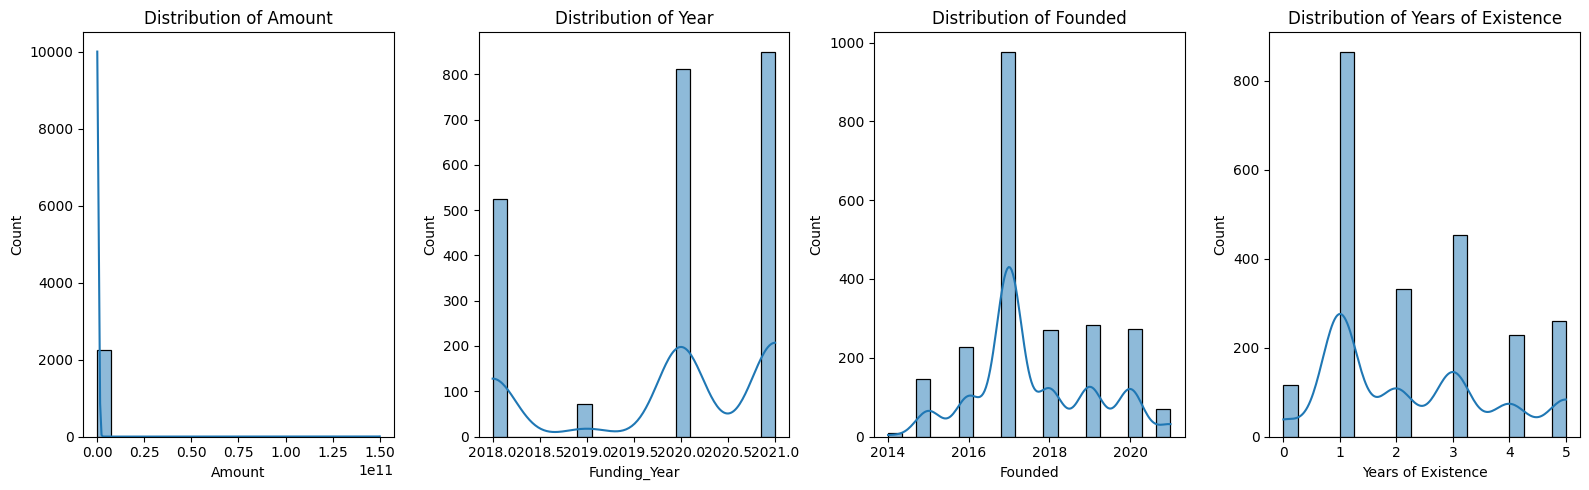

In [ ]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Distribution of 'Amount' column
sns.histplot(df['Amount'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Distribution of 'Funding_Year' column
sns.histplot(df['Funding_Year'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Year')

# Distribution of 'Founded' column
sns.histplot(df['Founded'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Founded')

# Distribution of 'Years of Existence' column
sns.histplot(df['Years of Existence'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Distribution of Years of Existence')

plt.tight_layout()
plt.show()

#### Univariate analysis for categorical columns

In [ ]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
# Create a figure with subplots for each numerical column
fig = make_subplots(rows=1, cols=len(numerical_summary.columns) - 1, subplot_titles=numerical_summary.columns[1:])
# Iterate over numerical columns and add histograms to subplots
for i, column in enumerate(numerical_summary.columns[1:], start=1):  # Start from the second column
    fig.add_trace(go.Histogram(x=df[column], nbinsx=20, name=column), row=1, col=i)

# Update the layout
fig.update_layout(title='Distribution of Numerical Columns',
                  xaxis_title='Value',
                  yaxis_title='Frequency',
                  height=400,  # Set the height of the figure
                  width=900)  # Set the width of the figure

# Show the plot 
fig.show()

##### Numerical -Categorical

In [ ]:
# Create the box plot using Plotly Express
fig = px.box(df, x='Main_Sector', y='Amount', title='Amount($) Distribution Across Main_Sector',
             labels={'sector': 'Sector', 'amount($)': 'Amount($)'})
fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  height=500,
                  width=900)
fig.show()

##### Categoricala

In [ ]:
# Create a count plot for Main_Sector using Plotly Express
fig = px.histogram(df, x='Main_Sector', title='Count of Startups in Each Sector')

# Update layout
fig.update_layout(xaxis_title='Sector', yaxis_title='Count', barmode='group',height =500, width = 900)

# Show the plot
fig.show()

##### Bivaraite

Numerical-Numerical relationship

In [ ]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='Funding_Year', y='Amount', title='Amount($) vs. Funding Year',
                 labels={'Year': 'Funding_Year', 'amount($)': 'Amount($)'})

# Customize the layout
fig.update_layout(xaxis_title='Funding Year', yaxis_title='Amount($)', xaxis_tickangle=-45, height =500, width = 900)

# Show the plot
fig.show()

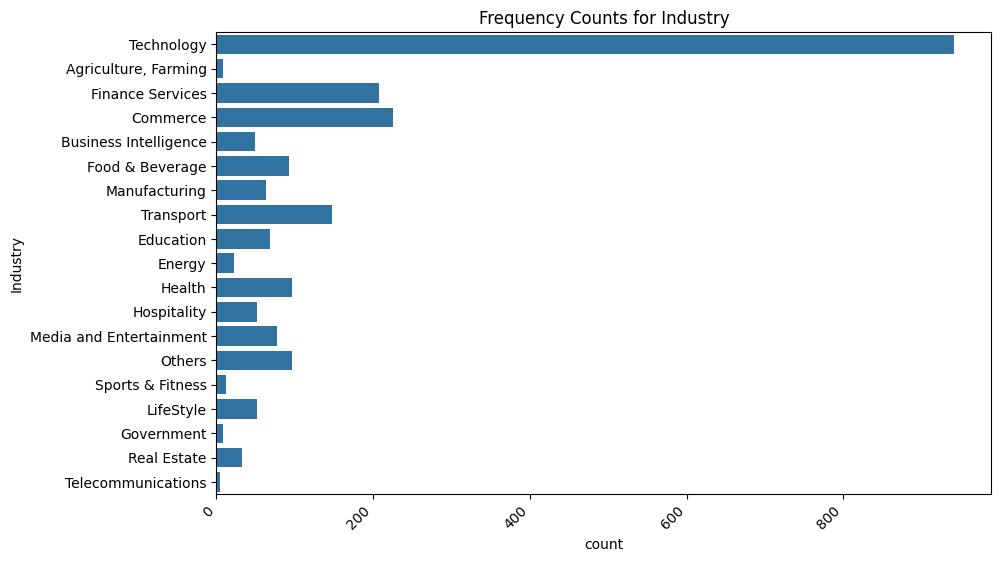

In [ ]:
# Univariate analysis for categorical columns
categorical_columns = [ 'Industry']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[column])
    plt.title(f'Frequency Counts for {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()